In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

### Importing the clients dataset

In [3]:
data = pd.read_csv(r'C:\Users\ASUS\Downloads\CLIENT.csv',sep=';' , index_col=False, dtype='unicode')

In [4]:
pd.set_option("display.max.columns", None)

### Exploratory Data Analysis (EDA)


In [5]:
data.head()

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENROLES,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_FAMILIA,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PACK_BABY,CLIENT_NOMBRE_PACK_BUSINESS,CLIENT_NOMBRE_PACK_ELITE,CLIENT_NOMBRE_PACK_ELITE_PRO,CLIENT_NOMBRE_PACK_EPARGNE,CLIENT_NOMBRE_PACK_EXPRESS,CLIENT_NOMBRE_PACK_FIRST,CLIENT_NOMBRE_PACK_NAJAH,CLIENT_NOMBRE_PACK_PLATI_PRO,CLIENT_NOMBRE_PACK_PLATIN,CLIENT_NOMBRE_PACK_SAFIR,CLIENT_NOMBRE_PACK_SAFIR_PRO,CLIENT_NOMBRE_PACK_SILVER,CLIENT_NOMBRE_PACK_TOUN,CLIENT_NOMBRE_PACK_TOUN_DVS,CLIENT_NOMBRE_PACK_UNIV,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,Activites juridiques,0,"27713,798",FALSE,AUTRE,"916,666",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Directeurs d'entreprises,900,CLIENT_A_VUE,0,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Autres activites manufacturieres n.c.a.,0,"84,396",NON,AUTRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,Coiffure et soins de beaute,"3013,95","849,304",NON,AUTRE,"1252,316",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Directeurs d'Ã©tablissements d'enseignement et...,538,CLIENT_A_VUE,"2933,30905",1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,Commerce de detail de tabac,0,"783,062",NON,AUTRE,"1748,31",0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,"349,79515",1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Commerce de gros d'equipements pour la constru...,"631,94",0,NON,AUTRE,"216,331",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,"1373,05",1


In [6]:
data.tail()

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENROLES,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_FAMILIA,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PACK_BABY,CLIENT_NOMBRE_PACK_BUSINESS,CLIENT_NOMBRE_PACK_ELITE,CLIENT_NOMBRE_PACK_ELITE_PRO,CLIENT_NOMBRE_PACK_EPARGNE,CLIENT_NOMBRE_PACK_EXPRESS,CLIENT_NOMBRE_PACK_FIRST,CLIENT_NOMBRE_PACK_NAJAH,CLIENT_NOMBRE_PACK_PLATI_PRO,CLIENT_NOMBRE_PACK_PLATIN,CLIENT_NOMBRE_PACK_SAFIR,CLIENT_NOMBRE_PACK_SAFIR_PRO,CLIENT_NOMBRE_PACK_SILVER,CLIENT_NOMBRE_PACK_TOUN,CLIENT_NOMBRE_PACK_TOUN_DVS,CLIENT_NOMBRE_PACK_UNIV,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,Transports maritimes,0,0,FALSE,AUTRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conducteurs dans le transport de marchandises,1000,CLIENT_EXCLUSIF_EPARGNE,"68,2356",1
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,Transports maritimes,0,0,NON,AUTRE,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CommerÃ§ants (autres),2000,CLIENT_PLACEUR,"1036,8706047608",1
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,Transports maritimes,0,0,NON,AUTRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Artisans (autres),1500,CLIENT_EXCLUSIF_EPARGNE,"1724,58635",1
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,Transports maritimes,0,"284,391",FALSE,AUTRE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conducteurs dans le transport de marchandises,1200,CLIENT_A_VUE,"17,43685",1
834752,401767,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,42,Transports maritimes,0,"617,537",FALSE,AUTRE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chauffeurs de taxis et conducteurs d'automobil...,4000,CLIENT_A_VUE,"1495,50345",1


In [7]:
data.shape

(834753, 40)

In [8]:
data.columns

Index(['CLIENT_ID', 'AGENCE', 'MARCHE', 'SEGMENT', 'SOUS SEGMENT',
       'CLIENT_AGE', 'CLIENT_ACTIVITE', 'CLIENT_ENCOURS_A_VUE',
       'CLIENT_ENCOURS_ENGAGEMENT', 'CLIENT_ENROLES', 'CLIENT_ENTREE_FINAL',
       'CLIENT_MMM', 'CLIENT_NOMBRE_BIATNET', 'CLIENT_NOMBRE_CARTES',
       'CLIENT_NOMBRE_MESSAGIS', 'CLIENT_NOMBRE_FAMILIA',
       'CLIENT_NOMBRE_OPCVM', 'CLIENT_NOMBRE_PACK_BABY',
       'CLIENT_NOMBRE_PACK_BUSINESS', 'CLIENT_NOMBRE_PACK_ELITE',
       'CLIENT_NOMBRE_PACK_ELITE_PRO', 'CLIENT_NOMBRE_PACK_EPARGNE',
       'CLIENT_NOMBRE_PACK_EXPRESS', 'CLIENT_NOMBRE_PACK_FIRST',
       'CLIENT_NOMBRE_PACK_NAJAH', 'CLIENT_NOMBRE_PACK_PLATI_PRO',
       'CLIENT_NOMBRE_PACK_PLATIN', 'CLIENT_NOMBRE_PACK_SAFIR',
       'CLIENT_NOMBRE_PACK_SAFIR_PRO', 'CLIENT_NOMBRE_PACK_SILVER',
       'CLIENT_NOMBRE_PACK_TOUN', 'CLIENT_NOMBRE_PACK_TOUN_DVS',
       'CLIENT_NOMBRE_PACK_UNIV', 'CLIENT_NOMBRE_PROJET_AVENIR',
       'CLIENT_NOMBRE_TITRES', 'CLIENT_PROFESSION',
       'CLIENT_REVENUS_MEN

In [9]:
data.describe().T

,count,unique,top,freq
CLIENT_ID,834753,834753,178601,1
AGENCE,818215,204,61,12192
MARCHE,834753,2,PART,752484
SEGMENT,834752,8,GRAND PUBLIC,307473
SOUS SEGMENT,834752,21,2 GP - ÉPARGNANT,227001
CLIENT_AGE,834458,130,30,23163
CLIENT_ACTIVITE,834753,495,N_D,777000
CLIENT_ENCOURS_A_VUE,834753,178887,0,647655
CLIENT_ENCOURS_ENGAGEMENT,834753,196759,0,615813
CLIENT_ENROLES,834753,3,NON,721960


### Numerical data

In [10]:
data.info()
#Assign types to the next columns
data.CLIENT_MMM = data.CLIENT_MMM.replace(',','.', regex=True).astype('float')
data.CLIENT_VRD_MOY = data.CLIENT_VRD_MOY.replace(',','.', regex=True).astype('float')
data.CLIENT_REVENUS_MENSUELS_NETS = data.CLIENT_REVENUS_MENSUELS_NETS.replace(',','.', regex=True).astype('float')
data.CLIENT_NOMBRE_CARTES = data.CLIENT_NOMBRE_CARTES.replace(',','.', regex=True).astype('float')
data.CLIENT_NOMBRE_BIATNET = data.CLIENT_NOMBRE_BIATNET.replace(',','.', regex=True).astype('float')
data.CLIENT_ENCOURS_ENGAGEMENT = data.CLIENT_ENCOURS_ENGAGEMENT.replace(',','.', regex=True).astype('float')
data.CLIENT_ENCOURS_A_VUE = data.CLIENT_ENCOURS_A_VUE.replace(',','.', regex=True).astype('float')
data.CLIENT_NOMBRE_PACK_ELITE = data.CLIENT_NOMBRE_PACK_ELITE.astype('int')
data.CLIENT_NOMBRE_PACK_ELITE_PRO = data.CLIENT_NOMBRE_PACK_ELITE_PRO.astype('int')
data.CLIENT_NOMBRE_PACK_EPARGNE = data.CLIENT_NOMBRE_PACK_EPARGNE.astype('int')
data.CLIENT_NOMBRE_PACK_EXPRESS = data.CLIENT_NOMBRE_PACK_EXPRESS.astype('int')
data.CLIENT_NOMBRE_PACK_FIRST = data.CLIENT_NOMBRE_PACK_FIRST.astype('int')
data.CLIENT_NOMBRE_PACK_NAJAH = data.CLIENT_NOMBRE_PACK_NAJAH.astype('int')
data.CLIENT_NOMBRE_PACK_PLATI_PRO = data.CLIENT_NOMBRE_PACK_PLATI_PRO.astype('int')
data.CLIENT_NOMBRE_PACK_PLATIN = data.CLIENT_NOMBRE_PACK_PLATIN.astype('int')
data.CLIENT_NOMBRE_PACK_SAFIR = data.CLIENT_NOMBRE_PACK_SAFIR.astype('int')
data.CLIENT_NOMBRE_PACK_SAFIR_PRO = data.CLIENT_NOMBRE_PACK_SAFIR_PRO.astype('int')
data.CLIENT_NOMBRE_PACK_SILVER = data.CLIENT_NOMBRE_PACK_SILVER.astype('int')
data.CLIENT_NOMBRE_PACK_UNIV = data.CLIENT_NOMBRE_PACK_UNIV.astype('int')
data.CLIENT_NOMBRE_PROJET_AVENIR = data.CLIENT_NOMBRE_PROJET_AVENIR.astype('int')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834753 entries, 0 to 834752
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CLIENT_ID                     834753 non-null  object
 1   AGENCE                        818215 non-null  object
 2   MARCHE                        834753 non-null  object
 3   SEGMENT                       834752 non-null  object
 4   SOUS SEGMENT                  834752 non-null  object
 5   CLIENT_AGE                    834458 non-null  object
 6   CLIENT_ACTIVITE               834753 non-null  object
 7   CLIENT_ENCOURS_A_VUE          834753 non-null  object
 8   CLIENT_ENCOURS_ENGAGEMENT     834753 non-null  object
 9   CLIENT_ENROLES                834753 non-null  object
 10  CLIENT_ENTREE_FINAL           834753 non-null  object
 11  CLIENT_MMM                    834753 non-null  object
 12  CLIENT_NOMBRE_BIATNET         834753 non-null  object
 13 

In [11]:
# Duplicated data
print(f'Total Duplicated Rows : {data.duplicated().sum()}')

Total Duplicated Rows : 0


--> No duplicated data in the dataframe

In [12]:
data['CLIENT_NOMBRE_FAMILIA'].unique()
data['CLIENT_NOMBRE_PACK_BABY'].unique()
data['CLIENT_NOMBRE_PACK_BUSINESS'].unique()
data['CLIENT_NOMBRE_PACK_TOUN'].unique()
data['CLIENT_NOMBRE_PACK_TOUN_DVS'].unique()


array(['0'], dtype=object)

--> These packs contains only 0 as a value, they won't be of no use

In [13]:
#Dropping the cloumns containing only 0's
data=data.drop(columns = ['CLIENT_NOMBRE_FAMILIA', 'CLIENT_NOMBRE_PACK_BABY','CLIENT_NOMBRE_PACK_BUSINESS','CLIENT_NOMBRE_PACK_TOUN','CLIENT_NOMBRE_PACK_TOUN_DVS'])


In [14]:
data['PACK'] = ''

In [15]:
data['PACK'] = np.where((data['CLIENT_NOMBRE_PACK_SAFIR'] > 0) | (data['CLIENT_NOMBRE_PACK_ELITE'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_ELITE_PRO'] > 0 ) |(data['CLIENT_NOMBRE_PACK_EPARGNE'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_EXPRESS'] > 0 ) |(data['CLIENT_NOMBRE_PACK_FIRST'] > 0)
                        |(data['CLIENT_NOMBRE_PACK_NAJAH'] > 0 ) |(data['CLIENT_NOMBRE_PACK_PLATI_PRO'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_PLATIN'] > 0 ) |(data['CLIENT_NOMBRE_PACK_SAFIR'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_SAFIR_PRO'] > 0 ) |(data['CLIENT_NOMBRE_PACK_SILVER'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_UNIV'] > 0 )
                        , True, False)

In [16]:
data['PACK']

0          True
1          True
2          True
3          True
4         False
          ...  
834748    False
834749    False
834750    False
834751    False
834752    False
Name: PACK, Length: 834753, dtype: bool

In [17]:
data['TOTAL_PACK'] = ''

cols = ['CLIENT_NOMBRE_PACK_ELITE','CLIENT_NOMBRE_PACK_ELITE_PRO','CLIENT_NOMBRE_PACK_EPARGNE','CLIENT_NOMBRE_PACK_EXPRESS','CLIENT_NOMBRE_PACK_FIRST','CLIENT_NOMBRE_PACK_NAJAH','CLIENT_NOMBRE_PACK_PLATI_PRO','CLIENT_NOMBRE_PACK_PLATIN','CLIENT_NOMBRE_PACK_SAFIR','CLIENT_NOMBRE_PACK_SAFIR_PRO','CLIENT_NOMBRE_PACK_SILVER','CLIENT_NOMBRE_PACK_UNIV']
data['TOTAL_PACK'] = data[cols].sum(axis=1)


In [18]:
data['TOTAL_PACK'].describe()

count    834753.000000
mean          0.581888
std           0.578811
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: TOTAL_PACK, dtype: float64

In [19]:
data=data.drop(columns = ['CLIENT_NOMBRE_PACK_ELITE','CLIENT_NOMBRE_PACK_ELITE_PRO','CLIENT_NOMBRE_PACK_EPARGNE','CLIENT_NOMBRE_PACK_EXPRESS','CLIENT_NOMBRE_PACK_FIRST','CLIENT_NOMBRE_PACK_NAJAH','CLIENT_NOMBRE_PACK_PLATI_PRO','CLIENT_NOMBRE_PACK_PLATIN','CLIENT_NOMBRE_PACK_SAFIR','CLIENT_NOMBRE_PACK_SAFIR_PRO','CLIENT_NOMBRE_PACK_SILVER','CLIENT_NOMBRE_PACK_UNIV'])


In [20]:
data

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENROLES,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR,PACK,TOTAL_PACK
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,Activites juridiques,0.00,27713.798,FALSE,AUTRE,916.666,1.0,0.0,0,0,0,0,Directeurs d'entreprises,900.0,CLIENT_A_VUE,0.000000,1,True,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Autres activites manufacturieres n.c.a.,0.00,84.396,NON,AUTRE,0.000,0.0,0.0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0.000000,1,True,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,Coiffure et soins de beaute,3013.95,849.304,NON,AUTRE,1252.316,0.0,1.0,1,0,0,0,Directeurs d'Ã©tablissements d'enseignement et...,538.0,CLIENT_A_VUE,2933.309050,1,True,1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,Commerce de detail de tabac,0.00,783.062,NON,AUTRE,1748.310,0.0,3.0,1,0,0,0,Magistrats,NaN,CLIENT_A_VUE,349.795150,1,True,1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Commerce de gros d'equipements pour la constru...,631.94,0.000,NON,AUTRE,216.331,0.0,0.0,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,1373.050000,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,Transports maritimes,0.00,0.000,FALSE,AUTRE,0.000,0.0,0.0,0,0,0,0,Conducteurs dans le transport de marchandises,1000.0,CLIENT_EXCLUSIF_EPARGNE,68.235600,1,False,0
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,Transports maritimes,0.00,0.000,NON,AUTRE,0.000,0.0,1.0,0,1,0,0,CommerÃ§ants (autres),2000.0,CLIENT_PLACEUR,1036.870605,1,False,0
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,Transports maritimes,0.00,0.000,NON,AUTRE,0.000,0.0,0.0,0,0,0,0,Artisans (autres),1500.0,CLIENT_EXCLUSIF_EPARGNE,1724.586350,1,False,0
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,Transports maritimes,0.00,284.391,FALSE,AUTRE,0.000,0.0,1.0,0,0,0,0,Conducteurs dans le transport de marchandises,1200.0,CLIENT_A_VUE,17.436850,1,False,0


In [21]:
# Checking the null values in our data
data.isnull().any()


CLIENT_ID                       False
AGENCE                           True
MARCHE                          False
SEGMENT                          True
SOUS SEGMENT                     True
CLIENT_AGE                       True
CLIENT_ACTIVITE                 False
CLIENT_ENCOURS_A_VUE            False
CLIENT_ENCOURS_ENGAGEMENT       False
CLIENT_ENROLES                  False
CLIENT_ENTREE_FINAL             False
CLIENT_MMM                      False
CLIENT_NOMBRE_BIATNET           False
CLIENT_NOMBRE_CARTES            False
CLIENT_NOMBRE_MESSAGIS          False
CLIENT_NOMBRE_OPCVM             False
CLIENT_NOMBRE_PROJET_AVENIR     False
CLIENT_NOMBRE_TITRES            False
CLIENT_PROFESSION               False
CLIENT_REVENUS_MENSUELS_NETS     True
CLIENT_TYPE_DEPOSANT            False
CLIENT_VRD_MOY                  False
VALEUR                          False
PACK                            False
TOTAL_PACK                      False
dtype: bool

--> These columns 'CLIENT_AGE' and 'CLIENT_REVENUS_MENSUELS_NETS' both contain null numeric values

In [22]:
data['CLIENT_AGE'].describe()


count     834458
unique       130
top           30
freq       23163
Name: CLIENT_AGE, dtype: object

In [23]:
data['CLIENT_AGE'].value_counts()

30     23163
29     22895
31     22267
32     21904
28     21847
       ...  
326        1
830        1
827        1
828        1
228        1
Name: CLIENT_AGE, Length: 130, dtype: int64

In [24]:
data['CLIENT_REVENUS_MENSUELS_NETS'].describe()


count    4.030710e+05
mean     2.123003e+03
std      9.645383e+04
min      0.000000e+00
25%      7.000000e+02
50%      1.000000e+03
75%      1.500000e+03
max      5.291859e+07
Name: CLIENT_REVENUS_MENSUELS_NETS, dtype: float64

--> Outliers exist in both columns, hence the null values will be replaced by the median value

C:\Users\ASUS\anaconda\envs\pythonProject2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


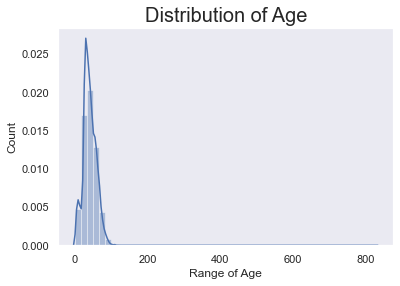

In [25]:
sns.set(style = 'dark')
sns.distplot(data['CLIENT_AGE'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [26]:
#Filling the missing data for the age feature with the median
data['CLIENT_AGE'].fillna(data['CLIENT_AGE'].median(), inplace=True)
data['CLIENT_AGE'].describe()
data.CLIENT_AGE = data.CLIENT_AGE.astype('int')


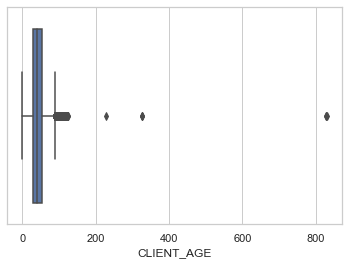

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = data["CLIENT_AGE"] ,data = data)

In [28]:
#Age range should be between 18 and 80 are accepted
index = data[(data['CLIENT_AGE'] >= 80)|(data['CLIENT_AGE'] <= 18)].index
data.drop(index, inplace=True)
data['CLIENT_AGE'].describe()

count    744035.000000
mean         43.031774
std          14.091018
min          19.000000
25%          31.000000
50%          41.000000
75%          53.000000
max          79.000000
Name: CLIENT_AGE, dtype: float64

C:\Users\ASUS\anaconda\envs\pythonProject2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


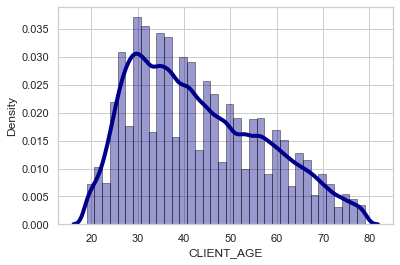

In [29]:
# Histogram and density of clients ages
sns.distplot(data['CLIENT_AGE'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

The feature AGE is Gaussian Distributed

<AxesSubplot:>

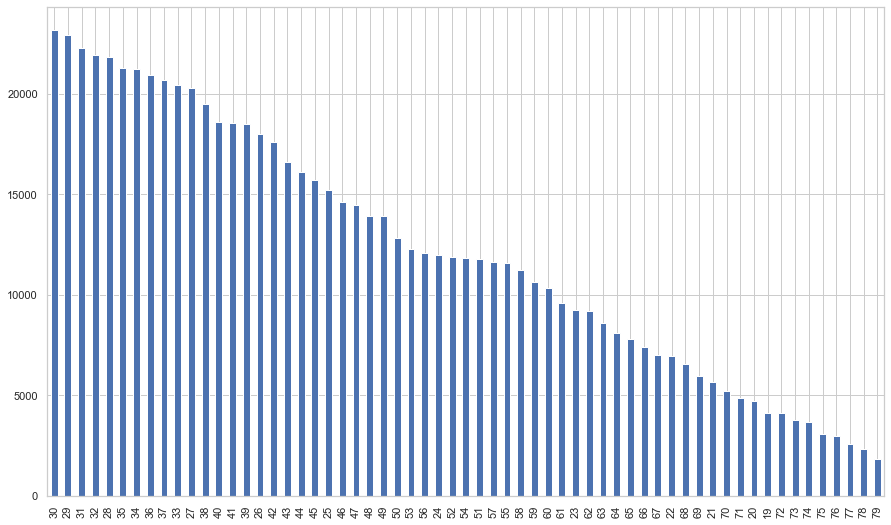

In [30]:
data['CLIENT_AGE'].value_counts().plot.bar(figsize = (15, 9))


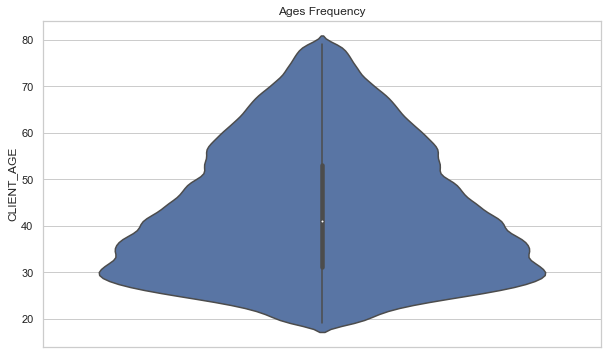

In [31]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["CLIENT_AGE"])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'

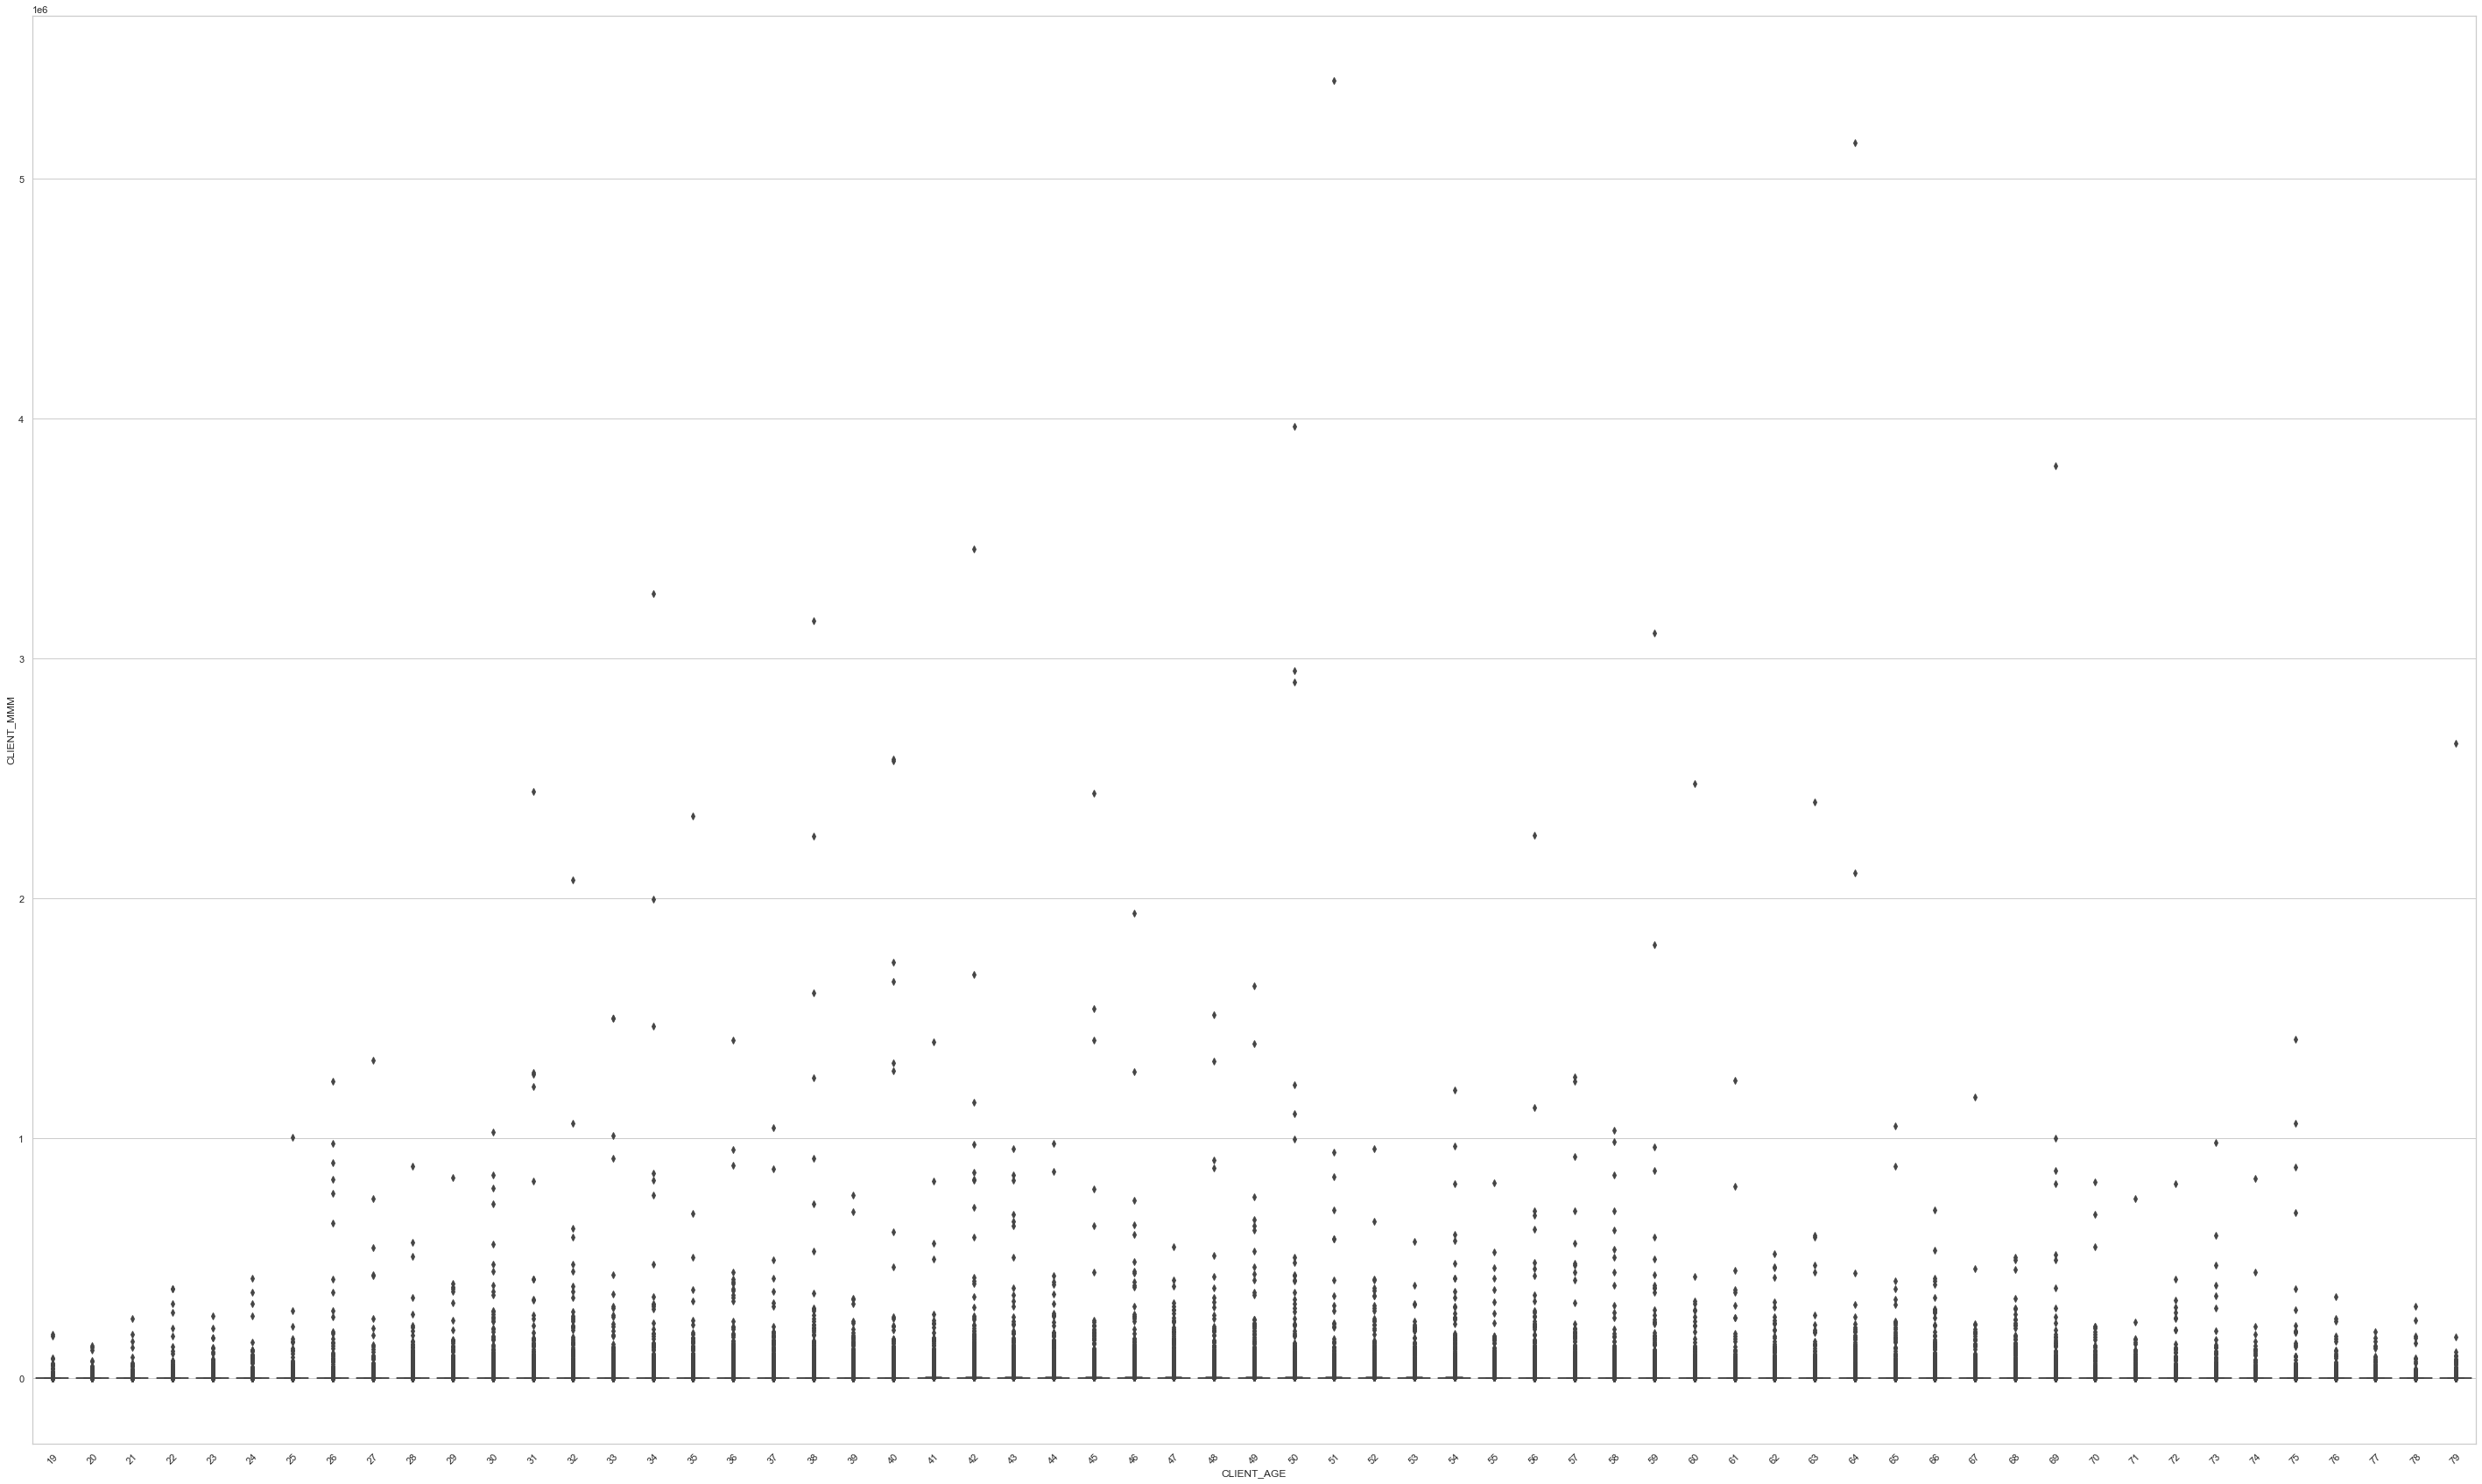

In [32]:
plt.figure(figsize = (50, 30))
ax = sns.boxplot(x = data['CLIENT_AGE'], y = data['CLIENT_MMM'], data= data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

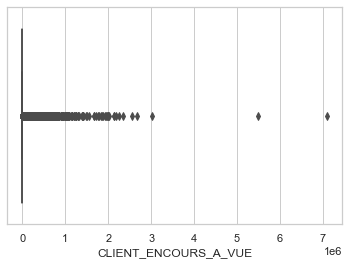

In [33]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = data["CLIENT_ENCOURS_A_VUE"] ,data = data)

The feature 'CLIENT_ENROLES' contains three attributes FALSE NON TRUE

In [34]:
data['CLIENT_ENROLES'].replace('NON','FALSE',inplace=True)


In [35]:
data['CLIENT_ENROLES'].value_counts()

FALSE    676025
TRUE      68010
Name: CLIENT_ENROLES, dtype: int64

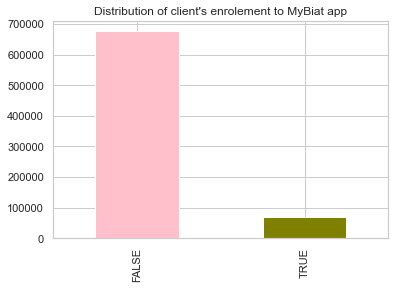

In [36]:
data.CLIENT_ENROLES.value_counts().plot(kind="bar" , color=['pink','olive'])
plt.title("Distribution of client's enrolement to MyBiat app")
plt.show()

--> Most of the clients are not enrolled to the application so the column can be removed

In [37]:
data=data.drop(columns = ['CLIENT_ENROLES'])


In [38]:
data['VALEUR'].unique()

array(['1'], dtype=object)

In [39]:
data=data.drop(columns = ['VALEUR'])


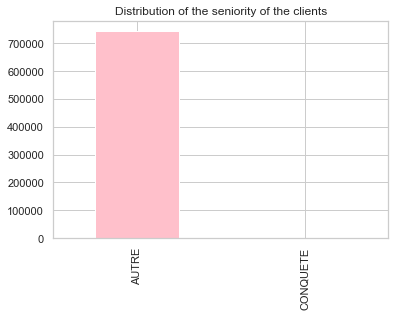

In [40]:
data.CLIENT_ENTREE_FINAL.value_counts().plot(kind="bar" , color=['pink','olive'])
plt.title("Distribution of the seniority of the clients")
plt.show()

In [41]:
len(data[data['CLIENT_ENTREE_FINAL']=='CONQUETE'])


604

In [42]:
len(data[data['CLIENT_ENTREE_FINAL']=='AUTRE'])


743431

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744035 entries, 0 to 834752
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CLIENT_ID                     744035 non-null  object 
 1   AGENCE                        727656 non-null  object 
 2   MARCHE                        744035 non-null  object 
 3   SEGMENT                       744034 non-null  object 
 4   SOUS SEGMENT                  744034 non-null  object 
 5   CLIENT_AGE                    744035 non-null  int32  
 6   CLIENT_ACTIVITE               744035 non-null  object 
 7   CLIENT_ENCOURS_A_VUE          744035 non-null  float64
 8   CLIENT_ENCOURS_ENGAGEMENT     744035 non-null  float64
 9   CLIENT_ENTREE_FINAL           744035 non-null  object 
 10  CLIENT_MMM                    744035 non-null  float64
 11  CLIENT_NOMBRE_BIATNET         744035 non-null  float64
 12  CLIENT_NOMBRE_CARTES          744035 non-nul

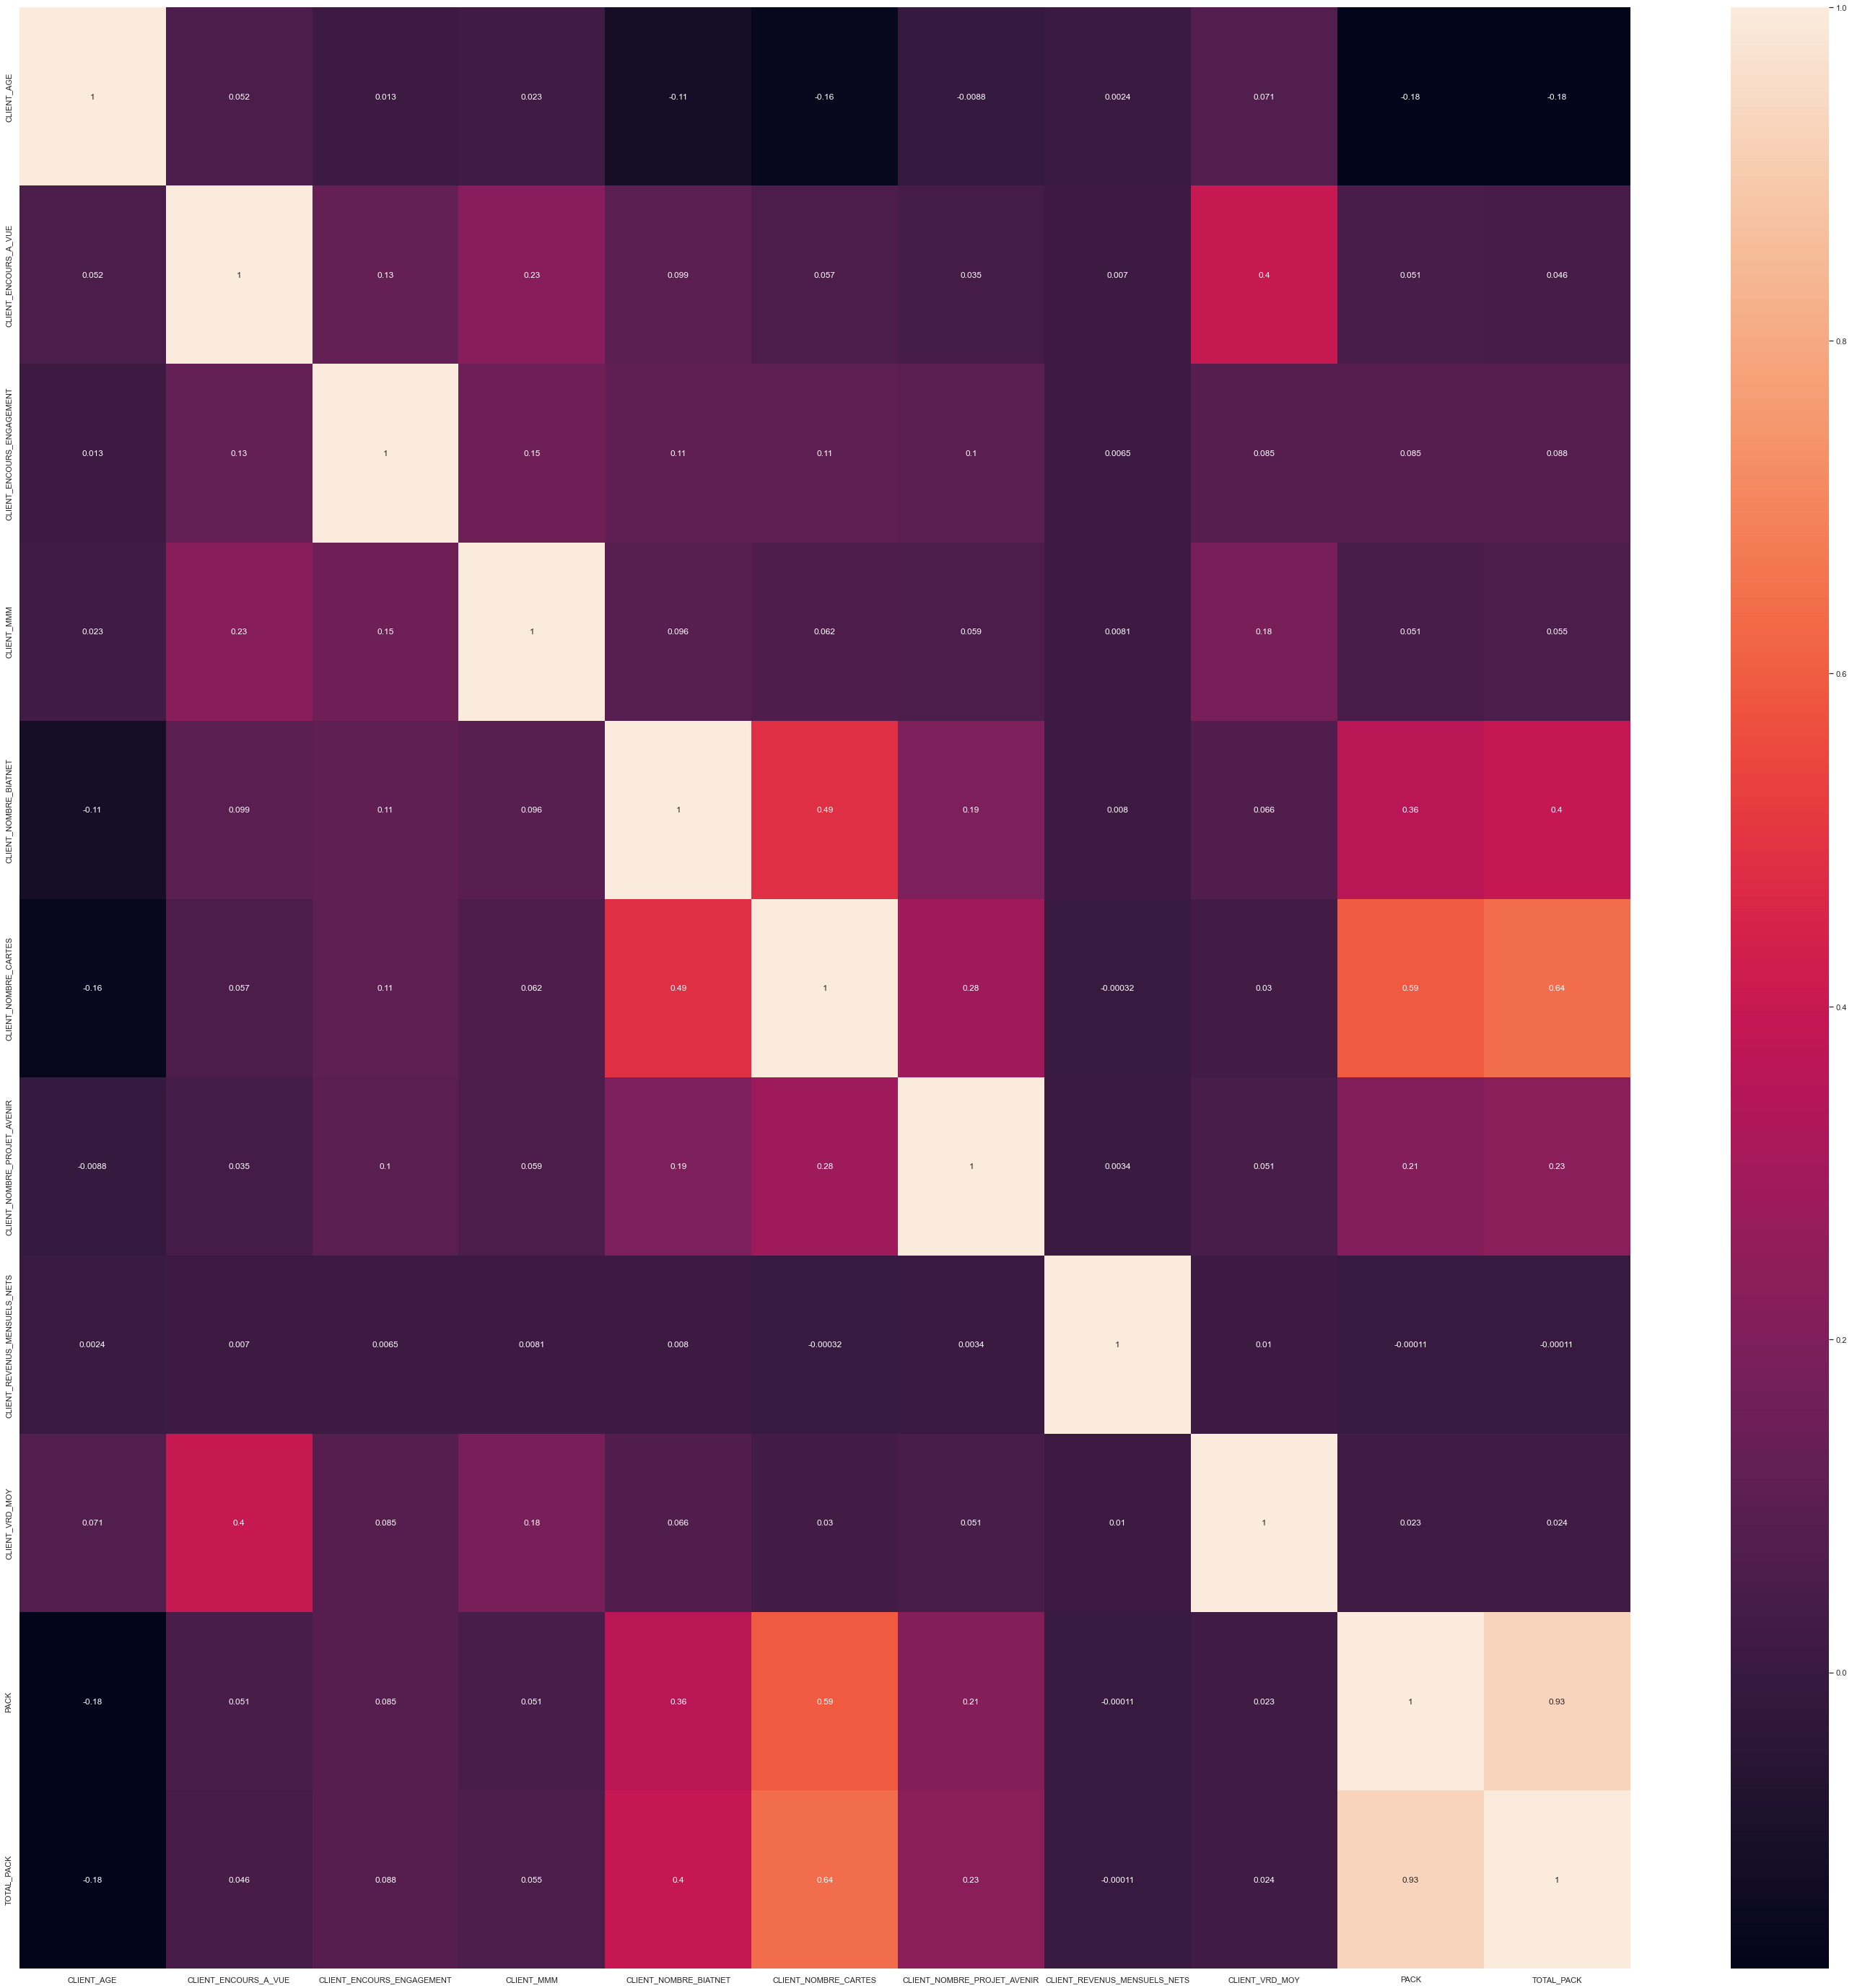

In [44]:
correlation = data.corr()
correlation
plt.figure(figsize=(50,50))
sns.heatmap(correlation, xticklabels=correlation.columns , yticklabels=correlation.columns , annot=True)
plt.savefig('figure1.png')
plt.show()

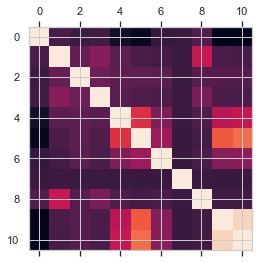

In [45]:
plt.matshow(data.corr())

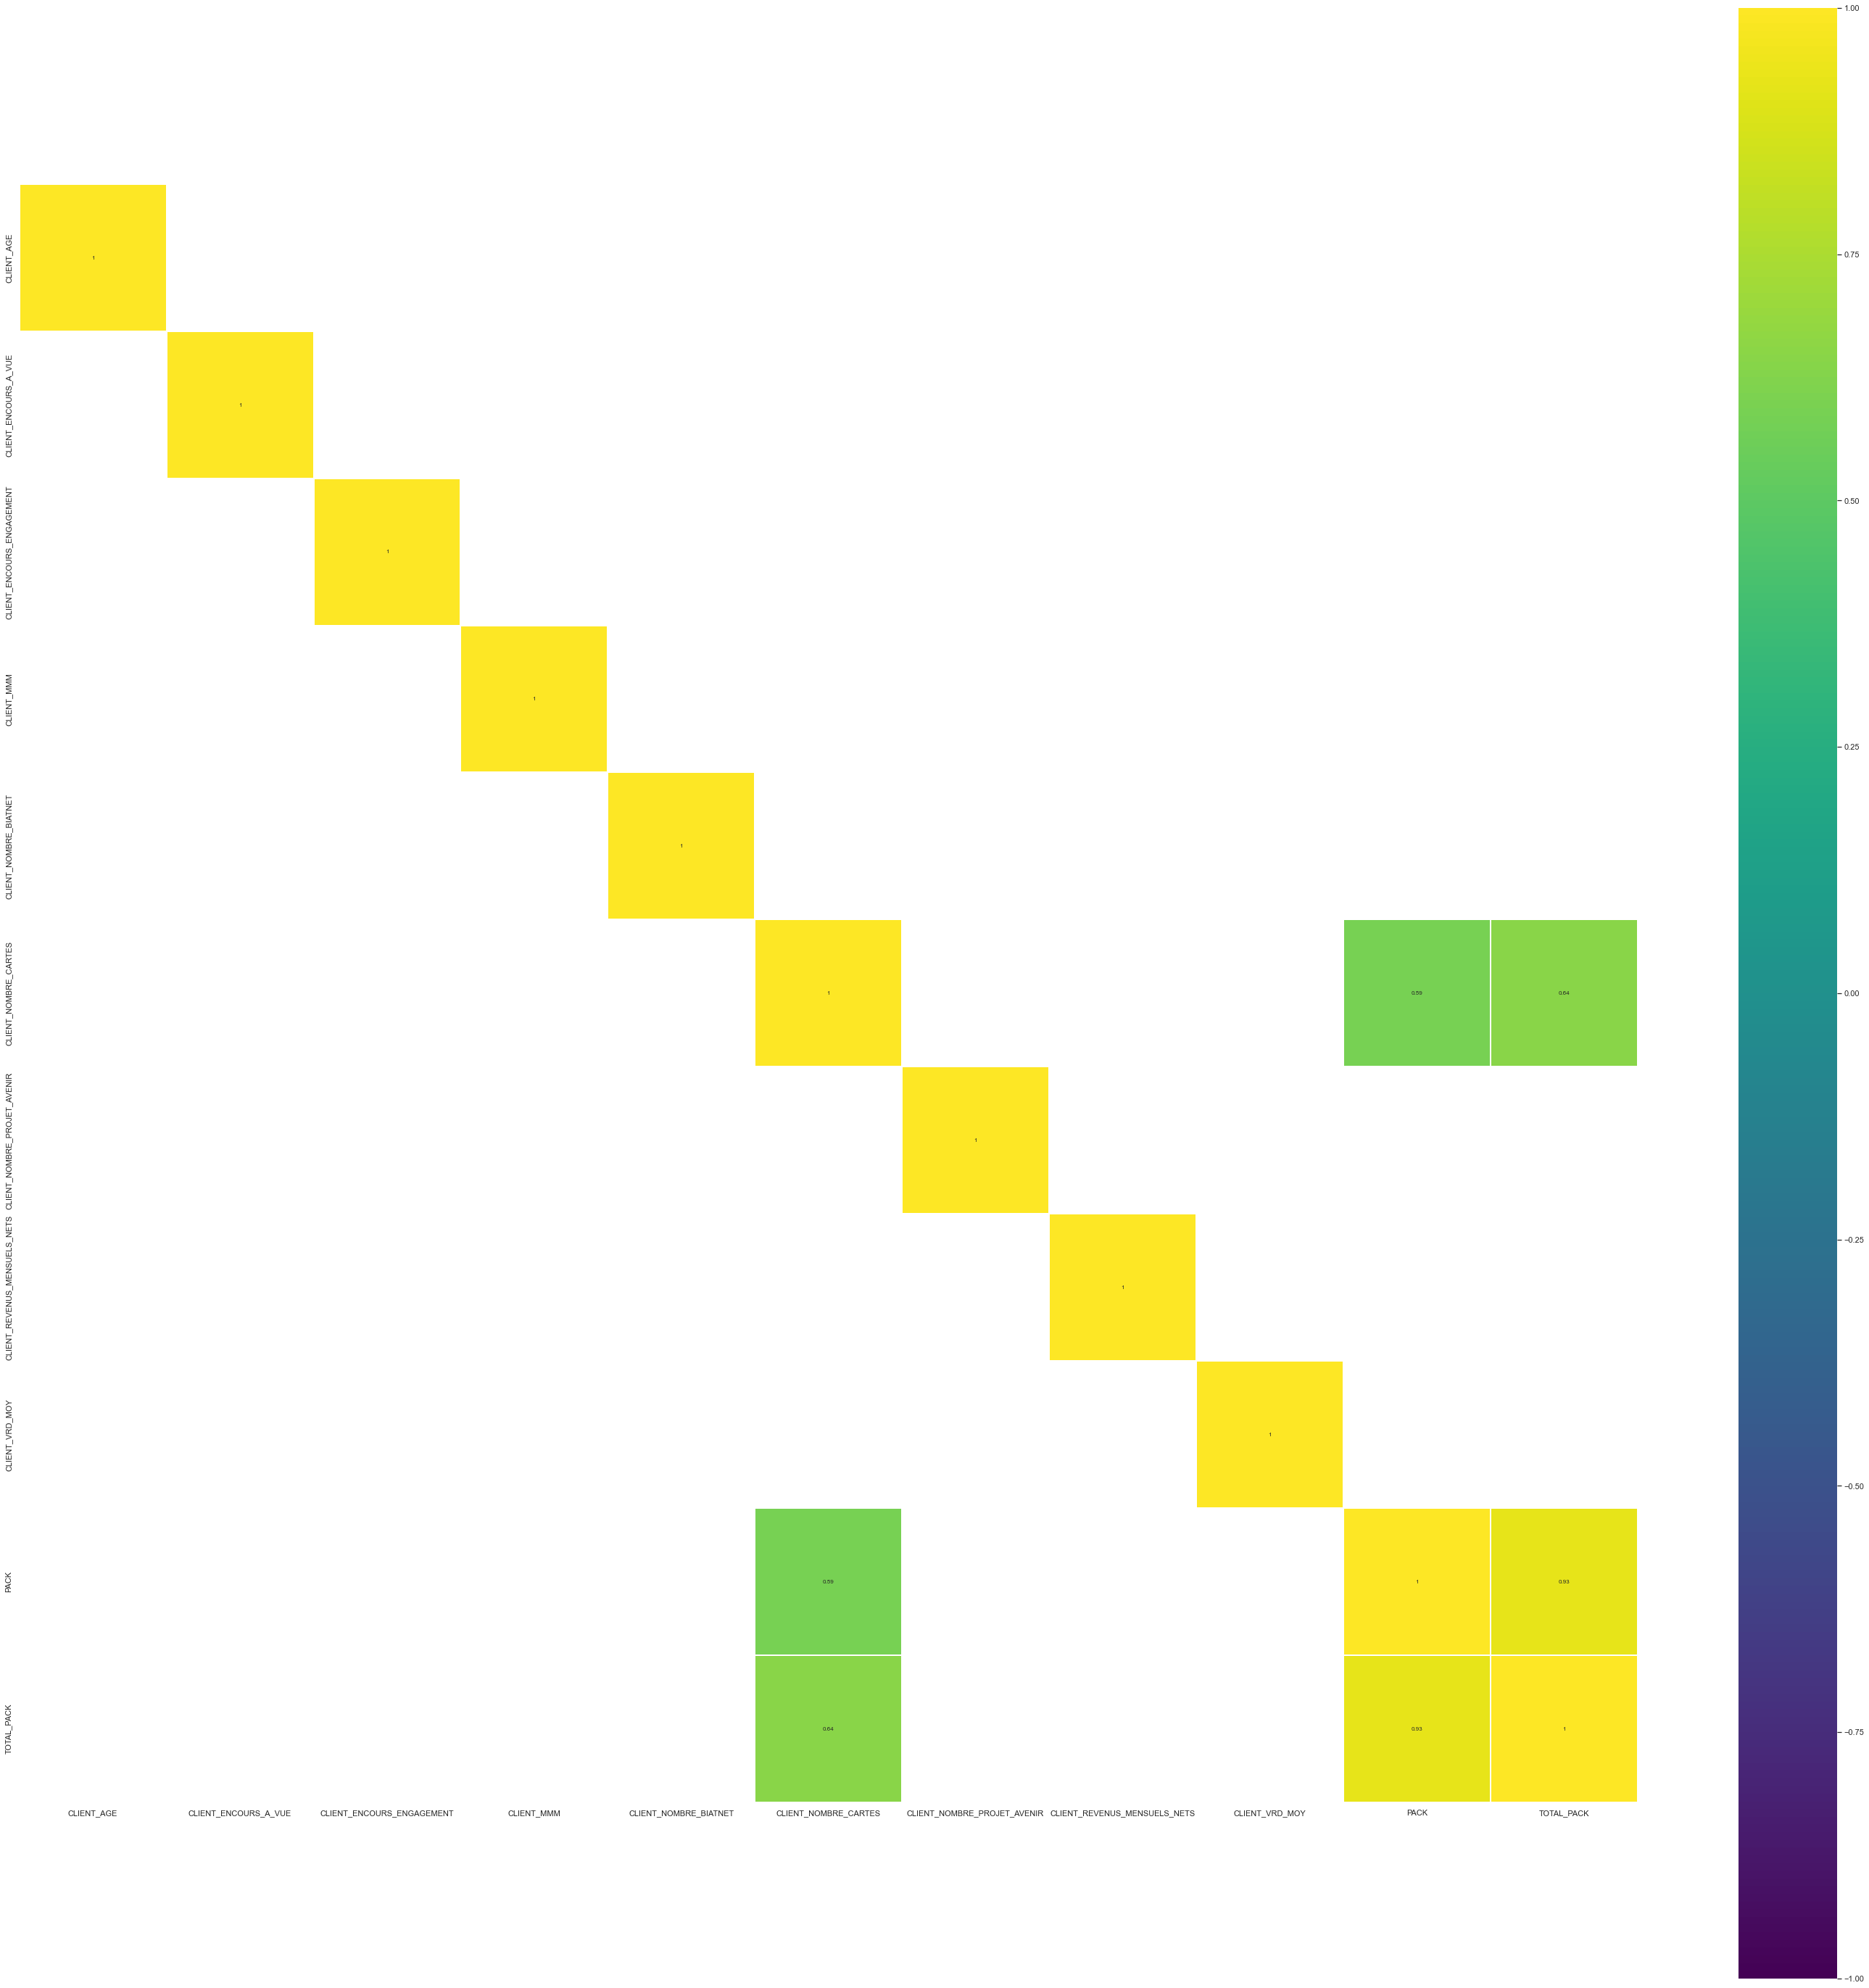

In [46]:
plt.figure(figsize=(50, (50)))

sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [47]:
data

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,Activites juridiques,0.00,27713.798,AUTRE,916.666,1.0,0.0,0,0,0,0,Directeurs d'entreprises,900.0,CLIENT_A_VUE,0.000000,True,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Autres activites manufacturieres n.c.a.,0.00,84.396,AUTRE,0.000,0.0,0.0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0.000000,True,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,Coiffure et soins de beaute,3013.95,849.304,AUTRE,1252.316,0.0,1.0,1,0,0,0,Directeurs d'Ã©tablissements d'enseignement et...,538.0,CLIENT_A_VUE,2933.309050,True,1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,Commerce de detail de tabac,0.00,783.062,AUTRE,1748.310,0.0,3.0,1,0,0,0,Magistrats,NaN,CLIENT_A_VUE,349.795150,True,1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Commerce de gros d'equipements pour la constru...,631.94,0.000,AUTRE,216.331,0.0,0.0,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,1373.050000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,Transports maritimes,0.00,0.000,AUTRE,0.000,0.0,0.0,0,0,0,0,Conducteurs dans le transport de marchandises,1000.0,CLIENT_EXCLUSIF_EPARGNE,68.235600,False,0
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,Transports maritimes,0.00,0.000,AUTRE,0.000,0.0,1.0,0,1,0,0,CommerÃ§ants (autres),2000.0,CLIENT_PLACEUR,1036.870605,False,0
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,Transports maritimes,0.00,0.000,AUTRE,0.000,0.0,0.0,0,0,0,0,Artisans (autres),1500.0,CLIENT_EXCLUSIF_EPARGNE,1724.586350,False,0
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,Transports maritimes,0.00,284.391,AUTRE,0.000,0.0,1.0,0,0,0,0,Conducteurs dans le transport de marchandises,1200.0,CLIENT_A_VUE,17.436850,False,0


In [48]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_VRD_MOY,TOTAL_PACK
0,0.00,27713.798,916.666,1.0,0.0,900.0,0.00000,1
1,0.00,84.396,0.000,0.0,0.0,NaN,0.00000,1
2,3013.95,849.304,1252.316,0.0,1.0,538.0,2933.30905,1
3,0.00,783.062,1748.310,0.0,3.0,NaN,349.79515,1
4,631.94,0.000,216.331,0.0,0.0,NaN,1373.05000,0


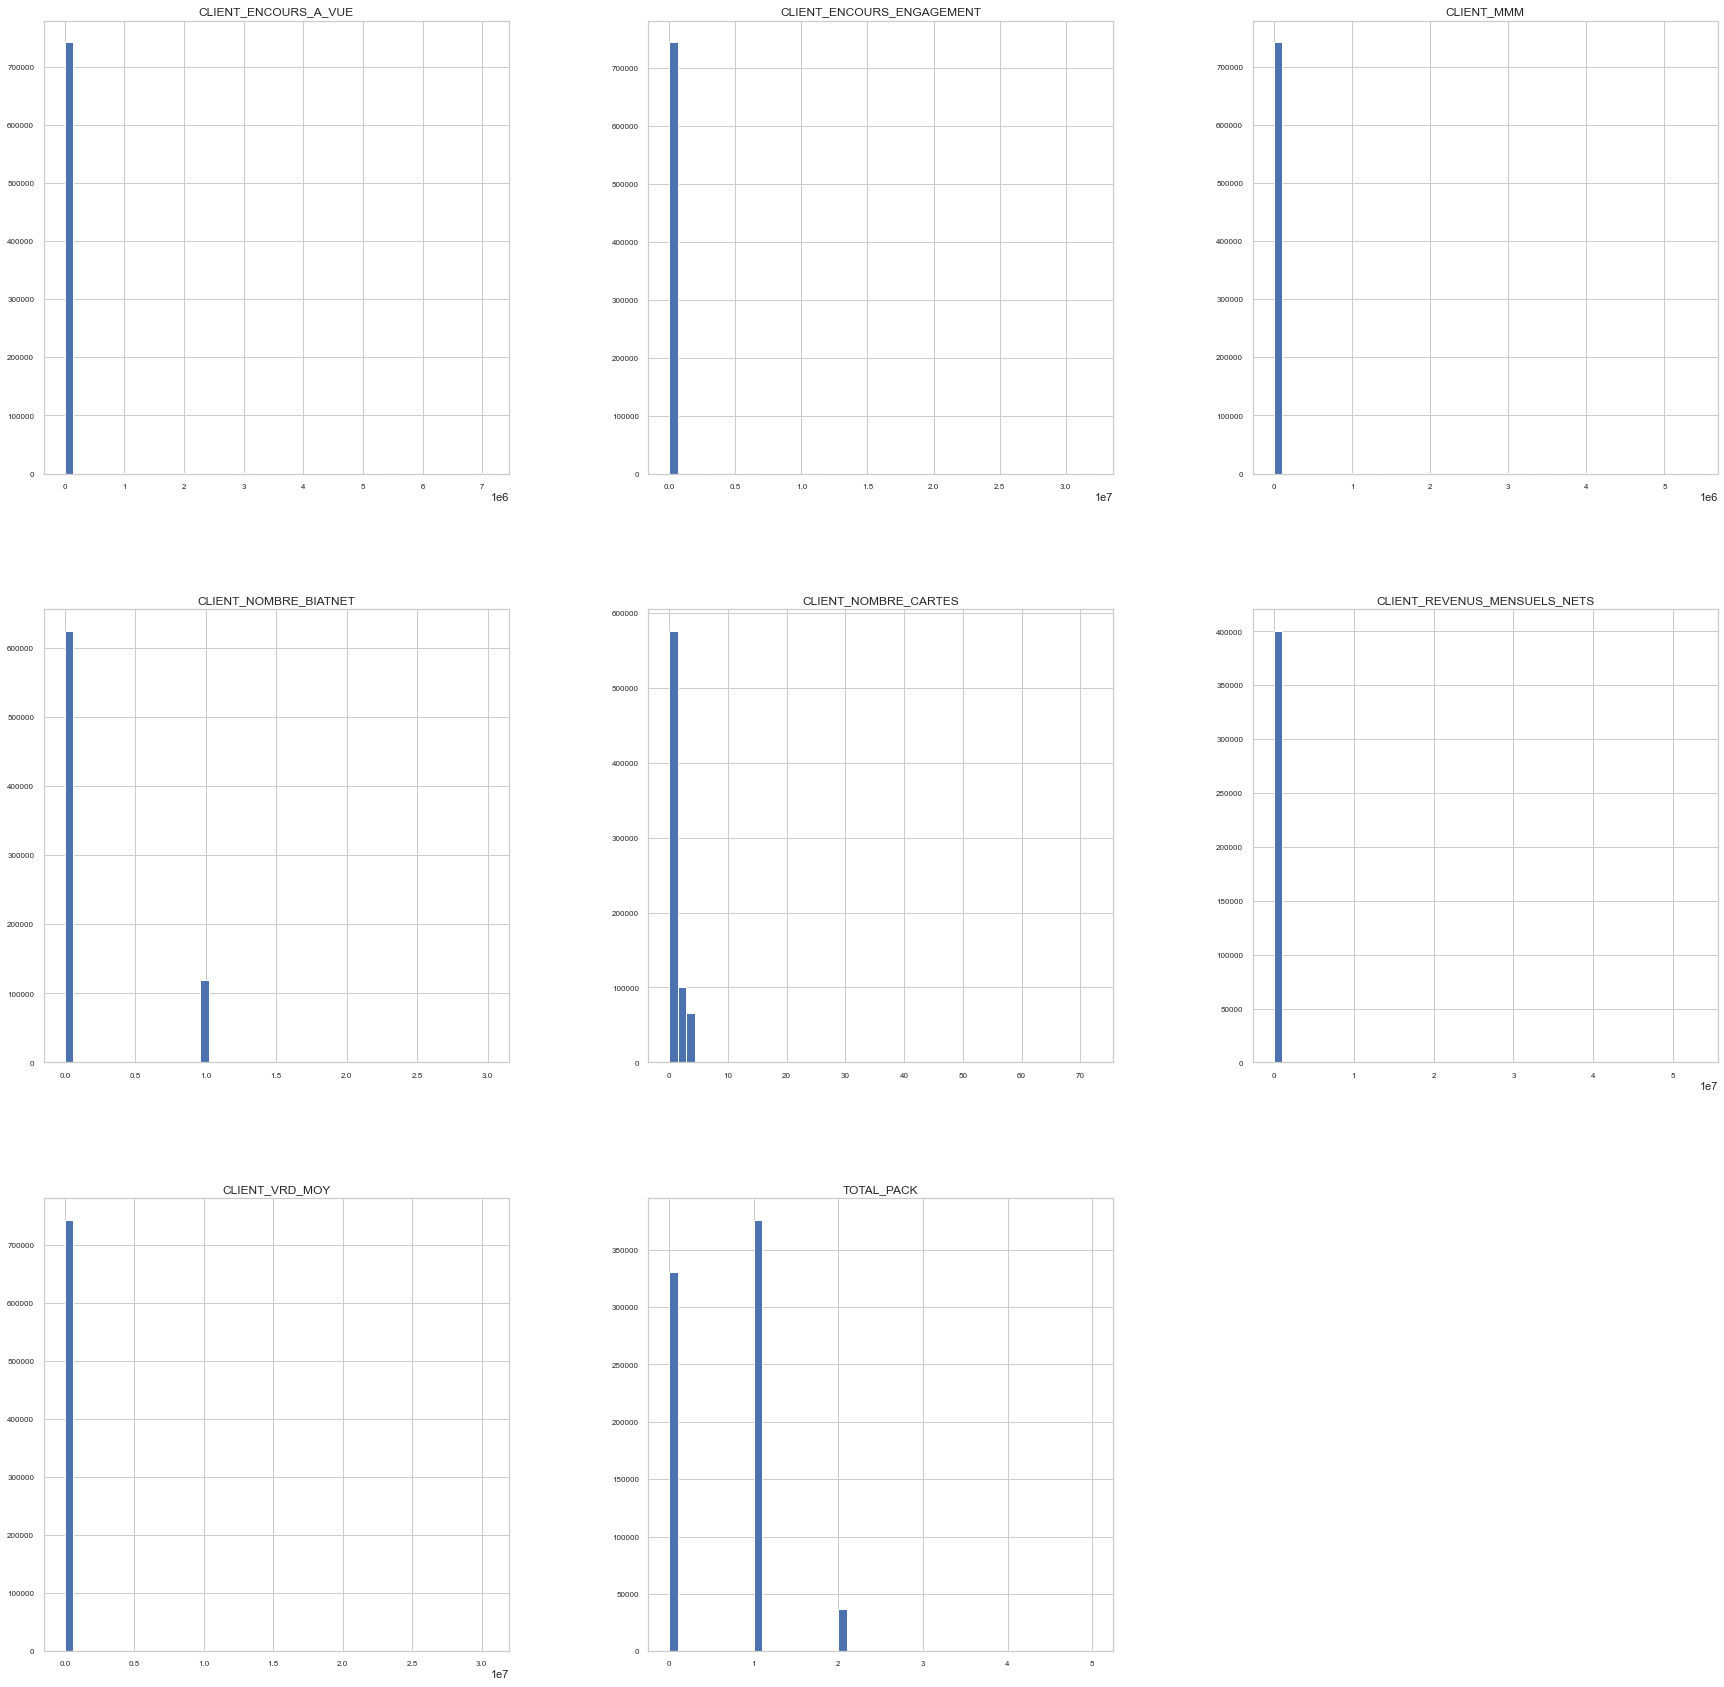

In [49]:
data_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


### Categorical data

In [50]:
data_cat = data.select_dtypes(include = ['object'])
data_cat.head()

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_ACTIVITE,CLIENT_ENTREE_FINAL,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_TYPE_DEPOSANT
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,Activites juridiques,AUTRE,0,0,0,Directeurs d'entreprises,CLIENT_A_VUE
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,Autres activites manufacturieres n.c.a.,AUTRE,0,0,0,Directeurs d'entreprises,CLIENT_A_VUE
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,Coiffure et soins de beaute,AUTRE,1,0,0,Directeurs d'Ã©tablissements d'enseignement et...,CLIENT_A_VUE
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,Commerce de detail de tabac,AUTRE,1,0,0,Magistrats,CLIENT_A_VUE
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,Commerce de gros d'equipements pour la constru...,AUTRE,0,0,0,Magistrats,CLIENT_A_VUE


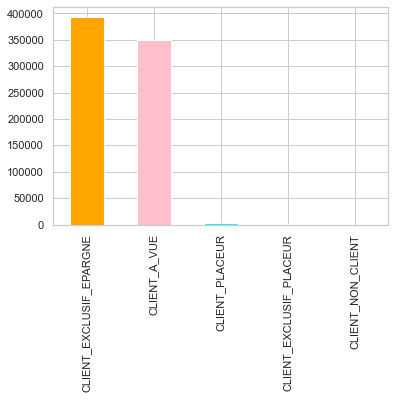

In [51]:
data['CLIENT_TYPE_DEPOSANT'].value_counts().plot(kind="bar" , color=['orange', 'pink', 'cyan', 'olive'])
plt.show()

In [52]:
data['CLIENT_ACTIVITE'].unique()

array(['Activites juridiques', 'Autres activites manufacturieres n.c.a.',
       'Coiffure et soins de beaute', 'Commerce de detail de tabac',
       "Commerce de gros d'equipements pour la construction",
       "Commerce de gros d'habillement",
       'Construction de batiments ( gros oeuvre )',
       'Hotels avec restaurant',
       'Intermediaires du commerce en produits divers', 'N_D',
       'Pratique medicale', 'Services domestiques',
       'Transports maritimes',
       'Autres commerces de detail en magasin non specialise sans predominance alimentaire',
       'Commerce de detail de livres, journaux et papeterie',
       'Fabrication de vetements de dessous', "Activites d'architecture",
       "Activites comptables et d'audit, conseil fiscal",
       'Autres intermediaires specialises du commerce',
       'Autres services personnels', 'Commerce de gros de textiles',
       'Culture de legumes, maraichage',
       'Fabrication de plaques, feuilles, tubes et profiles en matiere

In [53]:
data['CLIENT_PROFESSION'].unique()


array(["Directeurs d'entreprises",
       "Directeurs d'Ã©tablissements d'enseignement et de formation, et assimilÃ©s",
       'Magistrats', 'RetraitÃ©s',
       'Cadres moyens dans les autres services',
       "Hauts fonctionnaires de l'administration publique",
       "Enseignants de l'enseignement primaire",
       "Enseignants de l'enseignement secondaire", 'Sans profession',
       'MÃ©decins de la fonction publique et assimilÃ©s',
       'Autres cadres supÃ©rieurs',
       "Membres de l'exÃ©cutif et du corps lÃ©gislatif",
       "Cadres moyens dans l'administration publique",
       'Conducteurs dans le transport de marchandises',
       'Techniciens (autres)', "Cadres moyens dans l'industrie",
       'EmployÃ©s de bureau',
       'Techniciens en batiment et travaux publics',
       'Cadres moyens des services administratifs et financiers',
       'Enseignants universitaires', 'Ouvriers dans autres secteurs',
       "Ouvriers dans l'industrie",
       'SecrÃ©taires, opÃ©rateurs d

The columns 'CLIENT_ACTIVITE' and 'CLIENT_PROFESSION' both refer to same thing, hence only
the profession column will be left

In [54]:
data=data.drop(columns = ['CLIENT_ACTIVITE'])


                       count unique                      top    freq
SEGMENT               744034      8             GRAND PUBLIC  297934
SOUS SEGMENT          744034     21         2 GP - ÉPARGNANT  219165
CLIENT_PROFESSION     744035     91          Sans profession   82179
CLIENT_TYPE_DEPOSANT  744035      5  CLIENT_EXCLUSIF_EPARGNE  392372


(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125]),
 [Text(1, 0, 'SEGMENT_AUTRES'),
  Text(2, 0, 'SEGMENT_CLASSE MOYENNE'),
  Text(3, 0, 'SEGMENT_ENR'),
  Text(4, 0, 'SEGMENT_GRAND PUBLIC'),
  Text(5, 0, 'SEGMENT_HAUT DE GAMME'),
  Text(6, 0, 'SEGMENT_JEUNES'),
  Text(7, 0, 'SEGMENT_TRE'),
  Text(8, 0, 'SEGMENT_XXX'),
  Text(9, 0, 'SOUS SEGMEN

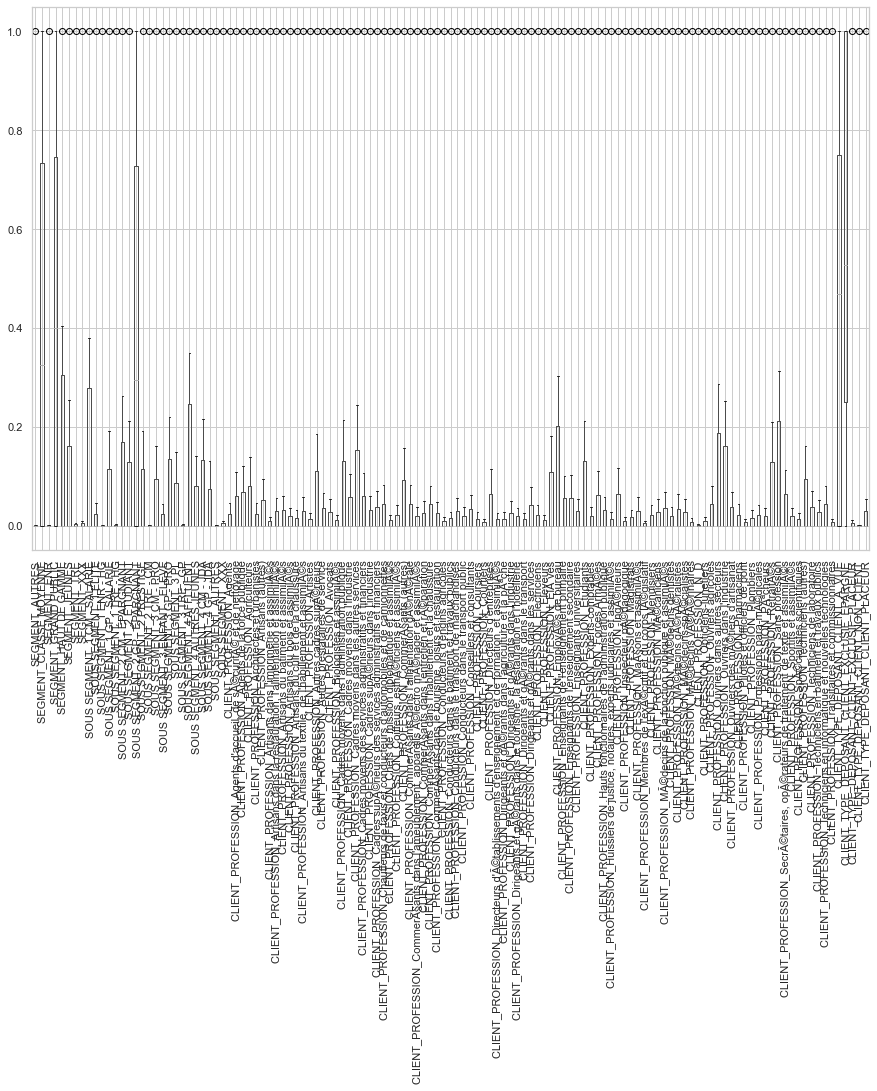

In [55]:
print (data[["SEGMENT","SOUS SEGMENT","CLIENT_PROFESSION","CLIENT_TYPE_DEPOSANT"]].describe(include="object").T)

categorical=pd.get_dummies(data[["SEGMENT","SOUS SEGMENT","CLIENT_PROFESSION","CLIENT_TYPE_DEPOSANT"]]).describe().T

categorical.drop("count",axis=1).T.boxplot(figsize=(15,10))
plt.xticks(rotation='vertical')

<AxesSubplot:>

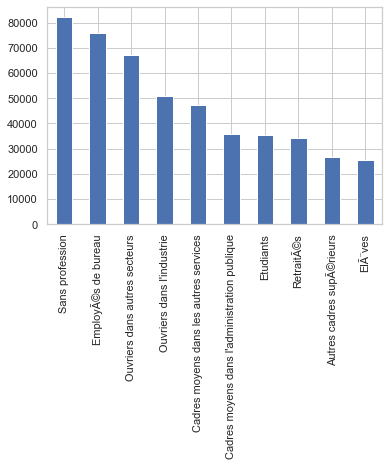

In [56]:
data.CLIENT_PROFESSION.value_counts()[:10].plot(kind='bar')


<AxesSubplot:>

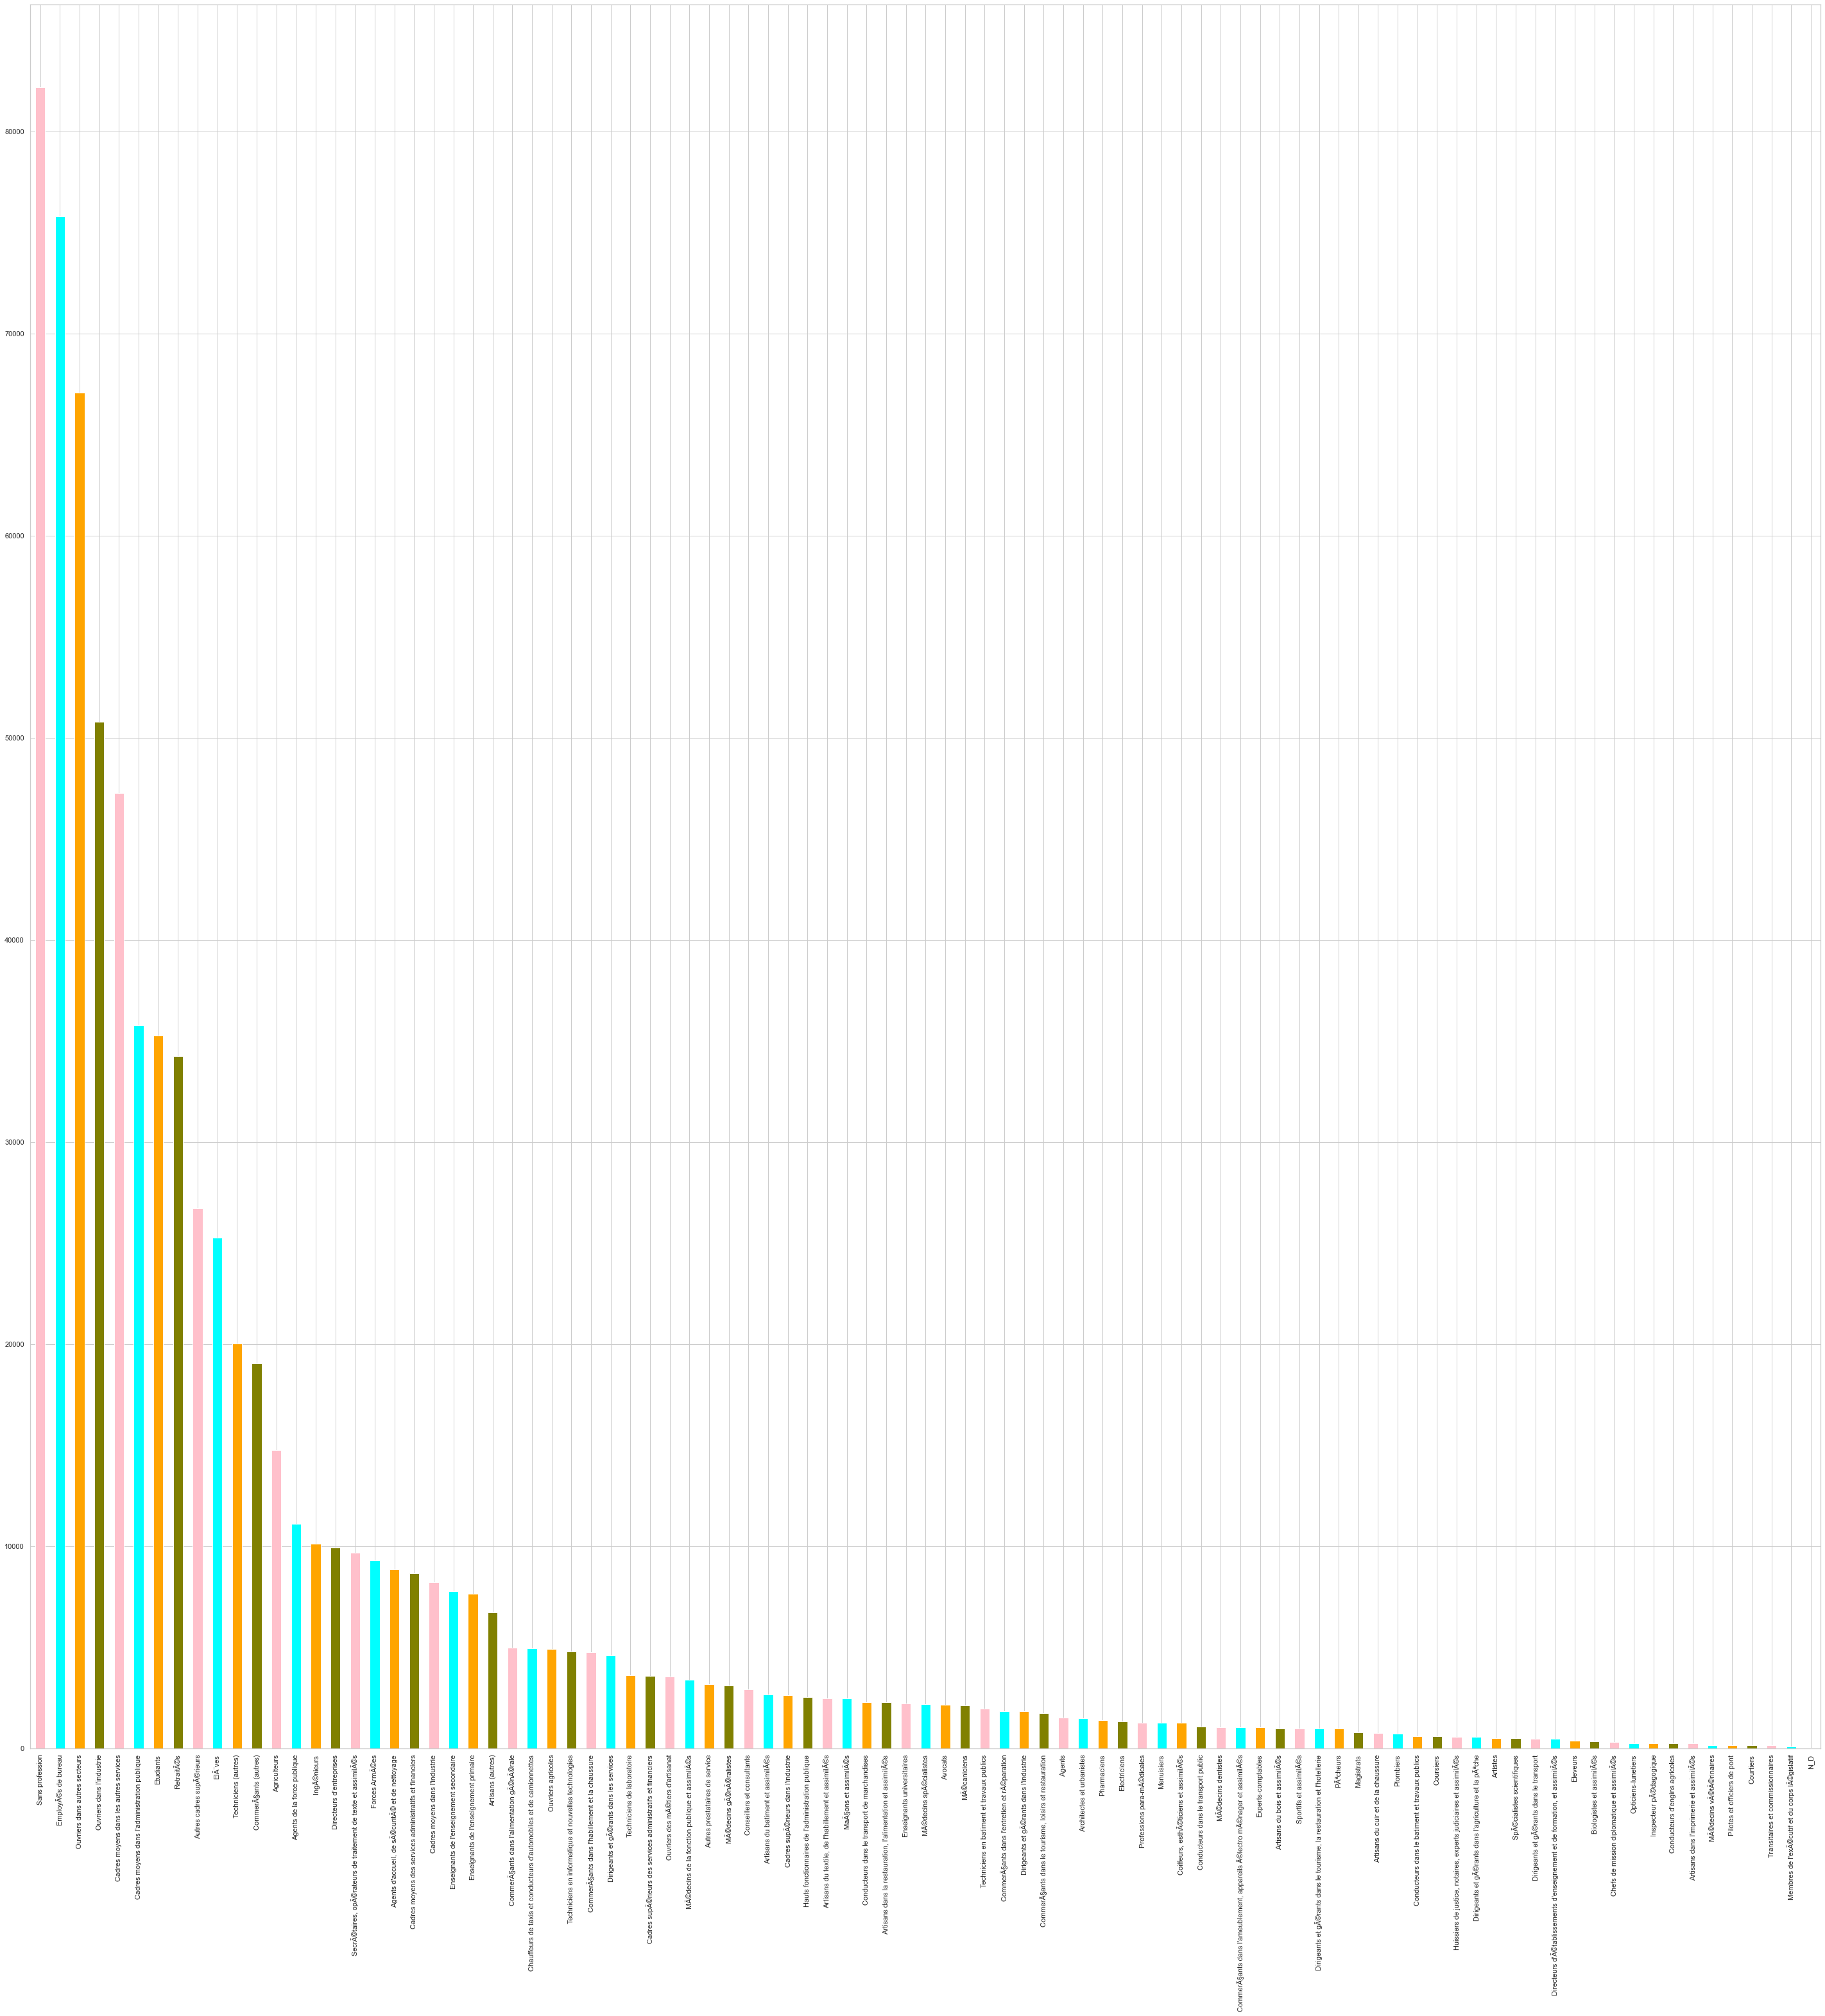

In [57]:
plt.figure(figsize=(50,50))
data['CLIENT_PROFESSION'].value_counts().plot(kind="bar" , color=['pink','cyan','orange','olive'])


In [58]:
#Cadre sup
data['CLIENT_PROFESSION'].replace("Autres cadres supÃ©rieurs", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres supÃ©rieurs des services administratifs et financiers", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres supÃ©rieurs dans l'industrie", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Hauts fonctionnaires de l'administration publique", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Chefs de mission diplomatique et assimilÃ©s", "Cadre supérieur", inplace=True)
#Cadre moy
data['CLIENT_PROFESSION'].replace("Cadres moyens dans les autres services", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens dans l'administration publique", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens dans l'industrie", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens des services administratifs et financiers", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens dans l'administration publique", "Cadre moyen", inplace=True)

#Justice

data['CLIENT_PROFESSION'].replace("Huissiers de justice, notaires, experts judiciaires et assimilÃ©s", "Acteur de la justice", inplace=True)
data['CLIENT_PROFESSION'].replace("Membres de l'exÃ©cutif et du corps lÃ©gislatif", "Acteur de la justice", inplace=True)
data['CLIENT_PROFESSION'].replace("Magistrats", "Acteur de la justice", inplace=True)
data['CLIENT_PROFESSION'].replace("Avocats", "Acteur de la justice", inplace=True)

#Employés de bureau

data['CLIENT_PROFESSION'].replace("EmployÃ©s de bureau", "Employés de bureau", inplace=True)
data['CLIENT_PROFESSION'].replace("SecrÃ©taires, opÃ©rateurs de traitement de texte et assimilÃ©s", "Employé de bureau", inplace=True)

#Retraités
data['CLIENT_PROFESSION'].replace("RetraitÃ©s", "Retraités", inplace=True)



#Santé
data['CLIENT_PROFESSION'].replace("MÃ©decins de la fonction publique et assimilÃ©s", "Professionnel en santé", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©decins gÃ©nÃ©ralistes", "Professionnel en santé", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©decins spÃ©cialistes", "Professionnel en santé", inplace=True)

data['CLIENT_PROFESSION'].replace("MÃ©decins dentistes", "Professionnel en santé", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©decins vÃ©tÃ©rinaires", "Professionnel en santé", inplace=True)

data['CLIENT_PROFESSION'].replace("Pharmaciens", "Professionnel en santé ", inplace=True)

data['CLIENT_PROFESSION'].replace("MÃ©decins", "Professionnel en santé ", inplace=True)

# para
data['CLIENT_PROFESSION'].replace("Opticiens-lunetiers", "Professionnel en para-médicales", inplace=True)
data['CLIENT_PROFESSION'].replace("Professions para-mÃ©dicales", "Professionnel en para-médicales", inplace=True)


#Dirigeant
data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans l'industrie", "Dirigeant et gérant ", inplace=True)
data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans le tourisme, la restauration et l'hotellerie", "Dirigeant et gérant", inplace=True)

data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans le transport", "Dirigeant et gérant", inplace=True)

data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans l'agriculture et la pÃªche", "Dirigeant et gérant", inplace=True)
data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans les services", "Dirigeant et gérant", inplace=True)

#Ingénieur
data['CLIENT_PROFESSION'].replace("IngÃ©nieurs", "Ingénieurs", inplace=True)

#Technicien
data['CLIENT_PROFESSION'].replace("Techniciens (autres)", "Technicien", inplace=True)
data['CLIENT_PROFESSION'].replace("Techniciens en batiment et travaux publics", "Technicien", inplace=True)
data['CLIENT_PROFESSION'].replace("Techniciens en informatique et nouvelles technologies", "Technicien", inplace=True)
data['CLIENT_PROFESSION'].replace("Techniciens de laboratoire", "Technicien", inplace=True)


#Ouvrier
data['CLIENT_PROFESSION'].replace("Ouvriers des mÃ©tiers d'artisanat", "Ouvrier", inplace=True)
data['CLIENT_PROFESSION'].replace("Ouvriers dans autres secteurs", "Ouvrier", inplace=True)
data['CLIENT_PROFESSION'].replace("Ouvriers dans l'industrie", "Ouvrier", inplace=True)
data['CLIENT_PROFESSION'].replace("Ouvriers agricoles", "Ouvrier", inplace=True)

#Scientifique
data['CLIENT_PROFESSION'].replace("SpÃ©cialistes scientifiques", "Spécialiste scientifique", inplace=True)
data['CLIENT_PROFESSION'].replace("Biologistes et assimilÃ©s", "Spécialiste scientifique", inplace=True)
#Prestataire de services
data['CLIENT_PROFESSION'].replace("Coiffeurs, esthÃ©ticiens et assimilÃ©s", "Prestataire de services", inplace=True)
data['CLIENT_PROFESSION'].replace("Courtiers", "Prestataire de services", inplace=True)
data['CLIENT_PROFESSION'].replace("Autres prestataires de service", "Prestataire de services", inplace=True)

#Acteur en bâtiment travaux publics
data['CLIENT_PROFESSION'].replace("MaÃ§ons et assimilÃ©s", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Electriciens", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©caniciens", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs dans le batiment et travaux publics", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Plombiers", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Architectes et urbanistes", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Menuisiers", "Acteur en bâtiment travaux publics", inplace=True)

#Consultant
data['CLIENT_PROFESSION'].replace("Conseillers et consultants", "Conseiller et consultant", inplace=True)
data['CLIENT_PROFESSION'].replace("Experts-comptables", "Conseiller et consultant", inplace=True)

#Service défense sécurité
data['CLIENT_PROFESSION'].replace("Forces ArmÃ©es", "Acteur en service de défense/sécurité", inplace=True)


data['CLIENT_PROFESSION'].replace("Agents de la force publique", "Acteur en service de défense/sécurité", inplace=True)
data['CLIENT_PROFESSION'].replace("Pilotes et officiers de pont", "Acteur en service de défense/sécurité", inplace=True)

#Artisan
data['CLIENT_PROFESSION'].replace("Artisans dans la restauration, l'alimentation et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du batiment et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du textile, de l'habillement et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans dans l'imprimerie et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du bois et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du cuir et de la chaussure", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans (autres)", "Artisan", inplace=True)

#Commerçant
data['CLIENT_PROFESSION'].replace("CommerÃ§ants (autres)", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'alimentation gÃ©nÃ©rale", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'entretien et rÃ©paration", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'habillement et la chaussure", "Commerçant", inplace=True)

data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans le tourisme, loisirs et restauration", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'ameublement, appareils Ã©lectro mÃ©nager et assimilÃ©s", "Commerçant", inplace=True)



#Education
data['CLIENT_PROFESSION'].replace("Inspecteur pÃ©dagogique", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Directeurs d'Ã©tablissements d'enseignement et de formation, et assimilÃ©s", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Enseignants de l'enseignement primaire", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Enseignants universitaires", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Enseignants de l'enseignement secondaire", "Acteur dans le secteur d'éducation", inplace=True)

#Agriculture
data['CLIENT_PROFESSION'].replace("PÃªcheurs", "Agriculteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Eleveurs", "Agriculteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Agriculteurs", "Agriculteur", inplace=True)

#Conducteurs
data['CLIENT_PROFESSION'].replace("Conducteurs dans le transport de marchandises", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Chauffeurs de taxis et conducteurs d'automobiles et de camionnettes", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs d'engins agricoles", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs dans le transport public", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs d'engins agricoles", "Conducteur", inplace=True)

data['CLIENT_PROFESSION'].replace("Etudiants", "Étudiants", inplace=True)
data['CLIENT_PROFESSION'].replace("Sportifs et assimilÃ©s", "Sportifs et assimilés", inplace=True)



#Agent

data['CLIENT_PROFESSION'].replace("Agents d'accueil, de sÃ©curitÃ© et de nettoyage", "Agent", inplace=True)
data['CLIENT_PROFESSION'].replace("Agents", "Agent", inplace=True)
data['CLIENT_PROFESSION'].replace("Transitaires et commissionnaires", "Agent", inplace=True)

data['CLIENT_PROFESSION'].replace("ElÃ¨ves", "Élèves", inplace=True)




In [59]:
data['CLIENT_PROFESSION'].unique()

array(["Directeurs d'entreprises", "Acteur dans le secteur d'éducation",
       'Acteur de la justice', 'Retraités', 'Cadre moyen',
       'Cadre supérieur', 'Sans profession', 'Professionnel en santé',
       'Conducteur', 'Technicien', 'Employés de bureau', 'Ouvrier',
       'Employé de bureau', 'Dirigeant et gérant ', 'Ingénieurs',
       'Élèves', 'Acteur en service de défense/sécurité',
       'Dirigeant et gérant', 'Artistes', 'Agent',
       'Acteur en bâtiment travaux publics', 'Agriculteur', 'Coursiers',
       'Artisan', 'Étudiants', 'Sportifs et assimilés',
       'Spécialiste scientifique', 'Commerçant',
       'Prestataire de services', 'Professionnel en santé ',
       'Professionnel en para-médicales', 'Conseiller et consultant',
       'N_D'], dtype=object)

In [60]:
# Replace the "unknow" Category Placeholder with the Mode value
data.CLIENT_PROFESSION.replace("N_D",data.CLIENT_PROFESSION.mode() [0],inplace=True)


In [61]:
data['CLIENT_PROFESSION'].unique()

array(["Directeurs d'entreprises", "Acteur dans le secteur d'éducation",
       'Acteur de la justice', 'Retraités', 'Cadre moyen',
       'Cadre supérieur', 'Sans profession', 'Professionnel en santé',
       'Conducteur', 'Technicien', 'Employés de bureau', 'Ouvrier',
       'Employé de bureau', 'Dirigeant et gérant ', 'Ingénieurs',
       'Élèves', 'Acteur en service de défense/sécurité',
       'Dirigeant et gérant', 'Artistes', 'Agent',
       'Acteur en bâtiment travaux publics', 'Agriculteur', 'Coursiers',
       'Artisan', 'Étudiants', 'Sportifs et assimilés',
       'Spécialiste scientifique', 'Commerçant',
       'Prestataire de services', 'Professionnel en santé ',
       'Professionnel en para-médicales', 'Conseiller et consultant'],
      dtype=object)

In [62]:
#create a fuction to explore the categorical variables

def plot(attribute_category):
    attribute_category.value_counts().plot(kind="bar")
    plt.title("attribute distribution")
    plt.show()
    print("\n")

    pd.crosstab(attribute_category,data.SEGMENT).T.plot(kind="bar",stacked = True)
    plt.legend(bbox_to_anchor=(1.0, 0.5))
    plt.title("The ratio of  attribute category to y category (yes/no)")
    plt.show()
    print("[Each column sums up to 1] ")
    print (pd.crosstab(attribute_category,data.SEGMENT,normalize="columns"))
    print("\n\n\n")

    pd.crosstab(attribute_category,data.SEGMENT).plot(kind="bar",stacked = True)
    plt.title("The ratio of y category (yes/no) to attribute category")
    plt.show()
    print("[Each row sums up to 1]")
    print (pd.crosstab(attribute_category,data.SEGMENT,normalize="index"))

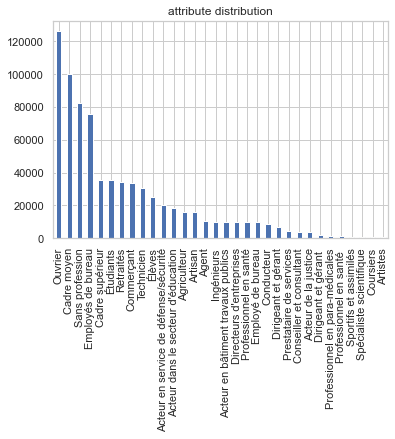

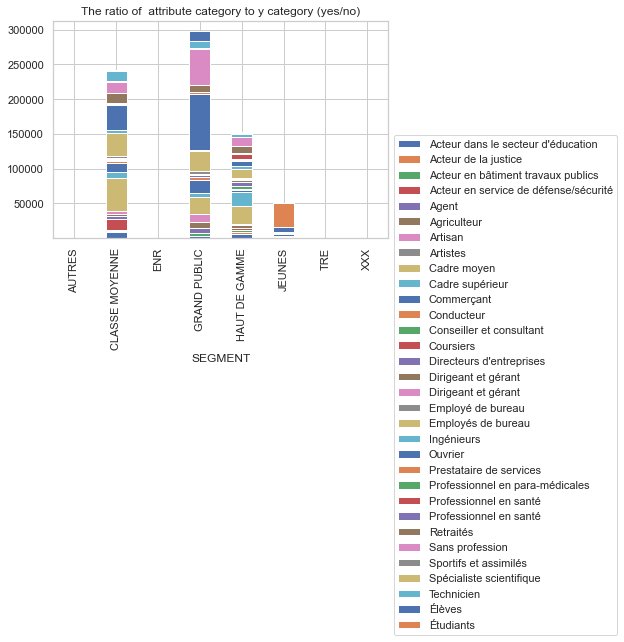

[Each column sums up to 1] 
SEGMENT                                AUTRES  CLASSE MOYENNE  ENR  \
CLIENT_PROFESSION                                                    
Acteur dans le secteur d'éducation        0.0        0.039983  0.0   
Acteur de la justice                      0.0        0.000470  0.0   
Acteur en bâtiment travaux publics        0.0        0.010561  0.0   
Acteur en service de défense/sécurité     0.0        0.066188  0.0   
Agent                                     0.0        0.012252  0.0   
Agriculteur                               0.0        0.012710  0.0   
Artisan                                   0.5        0.017409  0.0   
Artistes                                  0.0        0.000586  0.0   
Cadre moyen                               0.0        0.197082  0.5   
Cadre supérieur                           0.0        0.038230  0.5   
Commerçant                                0.5        0.049067  0.0   
Conducteur                                0.0        0.013341 

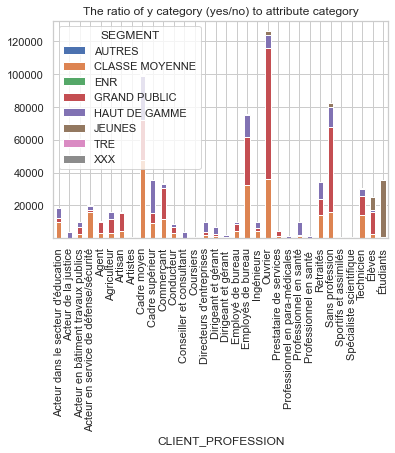

[Each row sums up to 1]
SEGMENT                                  AUTRES  CLASSE MOYENNE       ENR  \
CLIENT_PROFESSION                                                           
Acteur dans le secteur d'éducation     0.000000        0.529878  0.000000   
Acteur de la justice                   0.000000        0.032031  0.000000   
Acteur en bâtiment travaux publics     0.000000        0.257597  0.000000   
Acteur en service de défense/sécurité  0.000000        0.781757  0.000000   
Agent                                  0.000000        0.283749  0.000000   
Agriculteur                            0.000000        0.191652  0.000000   
Artisan                                0.000062        0.262650  0.000000   
Artistes                               0.000000        0.285141  0.000000   
Cadre moyen                            0.000000        0.478510  0.000010   
Cadre supérieur                        0.000000        0.259239  0.000028   
Commerçant                             0.000030     

In [63]:
plot(data.CLIENT_PROFESSION)

In [64]:
data['CLIENT_PROFESSION'].isna().sum()


0

In [65]:
data[data['CLIENT_PROFESSION'] == 'N_D']

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK


In [66]:
data.drop(columns= ['CLIENT_REVENUS_MENSUELS_NETS' , 'CLIENT_NOMBRE_MESSAGIS'])
# These values

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,0.00,27713.798,AUTRE,916.666,1.0,0.0,0,0,0,Directeurs d'entreprises,CLIENT_A_VUE,0.000000,True,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,0.00,84.396,AUTRE,0.000,0.0,0.0,0,0,0,Directeurs d'entreprises,CLIENT_A_VUE,0.000000,True,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,3013.95,849.304,AUTRE,1252.316,0.0,1.0,0,0,0,Acteur dans le secteur d'éducation,CLIENT_A_VUE,2933.309050,True,1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,0.00,783.062,AUTRE,1748.310,0.0,3.0,0,0,0,Acteur de la justice,CLIENT_A_VUE,349.795150,True,1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,631.94,0.000,AUTRE,216.331,0.0,0.0,0,0,0,Acteur de la justice,CLIENT_A_VUE,1373.050000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,0.00,0.000,AUTRE,0.000,0.0,0.0,0,0,0,Conducteur,CLIENT_EXCLUSIF_EPARGNE,68.235600,False,0
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,0.00,0.000,AUTRE,0.000,0.0,1.0,1,0,0,Commerçant,CLIENT_PLACEUR,1036.870605,False,0
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,0.00,0.000,AUTRE,0.000,0.0,0.0,0,0,0,Artisan,CLIENT_EXCLUSIF_EPARGNE,1724.586350,False,0
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,0.00,284.391,AUTRE,0.000,0.0,1.0,0,0,0,Conducteur,CLIENT_A_VUE,17.436850,False,0


In [67]:
data['AGENCE'].value_counts()

61    11027
10    10638
00    10241
77     9933
80     9877
      ...  
S5      625
L9      406
X1      273
X2      174
51       66
Name: AGENCE, Length: 204, dtype: int64

<AxesSubplot:>

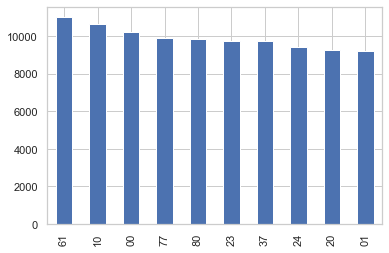

In [68]:
data.AGENCE.value_counts()[:10].plot(kind='bar')


In [69]:
data['MARCHE'].unique()

array(['PART', 'PRO'], dtype=object)

In [70]:
data[data['MARCHE'] == 'PART']

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,0.000,27713.798,AUTRE,916.666,1.0,0.0,0,0,0,0,Directeurs d'entreprises,900.0,CLIENT_A_VUE,0.00000,True,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,0.000,84.396,AUTRE,0.000,0.0,0.0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0.00000,True,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,3013.950,849.304,AUTRE,1252.316,0.0,1.0,1,0,0,0,Acteur dans le secteur d'éducation,538.0,CLIENT_A_VUE,2933.30905,True,1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,0.000,783.062,AUTRE,1748.310,0.0,3.0,1,0,0,0,Acteur de la justice,NaN,CLIENT_A_VUE,349.79515,True,1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,631.940,0.000,AUTRE,216.331,0.0,0.0,0,0,0,0,Acteur de la justice,NaN,CLIENT_A_VUE,1373.05000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830924,737286,NaN,PART,TRE,3 TRE - GP,34,0.000,398.234,AUTRE,0.000,0.0,2.0,0,0,0,0,Cadre moyen,850.0,CLIENT_A_VUE,0.00000,True,1
830925,1346231,NaN,PART,XXX,XXX,46,0.000,0.000,AUTRE,0.000,0.0,1.0,0,0,0,0,Acteur en service de défense/sécurité,2000.0,CLIENT_EXCLUSIF_EPARGNE,49.64530,True,1
830926,1339184,NaN,PART,XXX,XXX,45,0.000,822.155,AUTRE,0.000,0.0,0.0,0,0,1,0,Cadre supérieur,5000.0,CLIENT_A_VUE,10960.73140,False,0
830927,1352883,NaN,PART,XXX,XXX,32,0.000,1438.000,AUTRE,0.000,0.0,0.0,0,0,0,0,Acteur en service de défense/sécurité,1576.0,CLIENT_A_VUE,0.00000,True,1


In [71]:
data['CLIENT_TYPE_DEPOSANT'].unique()

array(['CLIENT_A_VUE', 'CLIENT_EXCLUSIF_EPARGNE', 'CLIENT_PLACEUR',
       'CLIENT_EXCLUSIF_PLACEUR', 'CLIENT_NON_CLIENT'], dtype=object)

In [72]:
data['CLIENT_TYPE_DEPOSANT'].value_counts()

CLIENT_EXCLUSIF_EPARGNE    392372
CLIENT_A_VUE               349361
CLIENT_PLACEUR               2204
CLIENT_EXCLUSIF_PLACEUR        97
CLIENT_NON_CLIENT               1
Name: CLIENT_TYPE_DEPOSANT, dtype: int64

<AxesSubplot:>

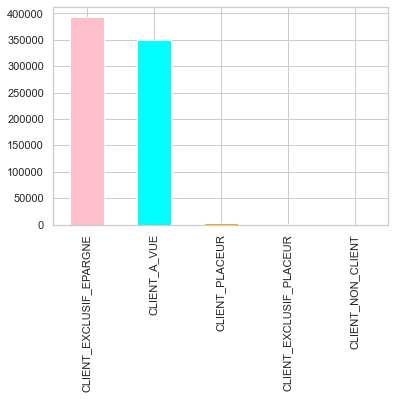

In [73]:
data['CLIENT_TYPE_DEPOSANT'].value_counts().plot(kind="bar" , color=['pink','cyan','orange','olive'])


In [74]:
data['SEGMENT'].unique()

array(['CLASSE MOYENNE', 'GRAND PUBLIC', 'HAUT DE GAMME', 'JEUNES', 'XXX',
       'TRE', 'ENR', nan, 'AUTRES'], dtype=object)

In [75]:
#working only with these four segments 'CLASSE MOYENNE', 'GRAND PUBLIC', 'HAUT DE GAMME', 'JEUNES'
data.drop(data[data['SEGMENT'] == 'XXX'].index, inplace = True)
data.drop(data[data['SEGMENT'] == 'TRE'].index, inplace = True)
data.drop(data[data['SEGMENT'] == 'ENR'].index, inplace = True)
data.drop(data[data['SEGMENT'] == 'AUTRES'].index, inplace = True)
data['SEGMENT'].unique()

array(['CLASSE MOYENNE', 'GRAND PUBLIC', 'HAUT DE GAMME', 'JEUNES', nan],
      dtype=object)

In [76]:
data['SEGMENT'].info()


<class 'pandas.core.series.Series'>
Int64Index: 743942 entries, 0 to 834752
Series name: SEGMENT
Non-Null Count   Dtype 
--------------   ----- 
743941 non-null  object
dtypes: object(1)
memory usage: 11.4+ MB


In [77]:

data['SEGMENT'].value_counts()


GRAND PUBLIC      297934
CLASSE MOYENNE    242402
HAUT DE GAMME     152200
JEUNES             51405
Name: SEGMENT, dtype: int64

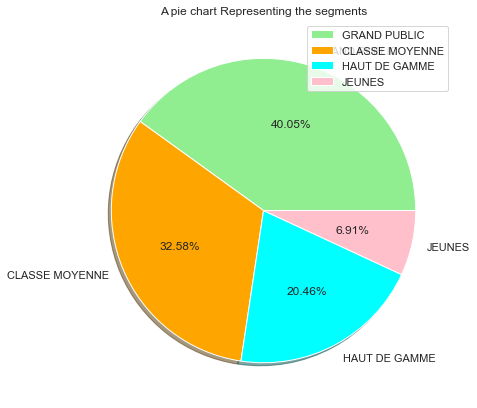

In [78]:
labels = ['GRAND PUBLIC ', 'CLASSE MOYENNE','HAUT DE GAMME','JEUNES']
size = [297934, 242402 , 152200 ,51405 ]
colors = ['lightgreen', 'orange','cyan','pink']
explode = None

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the segments')
plt.axis('off')
plt.legend()
plt.show()

In [79]:
data

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,0.00,27713.798,AUTRE,916.666,1.0,0.0,0,0,0,0,Directeurs d'entreprises,900.0,CLIENT_A_VUE,0.000000,True,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,0.00,84.396,AUTRE,0.000,0.0,0.0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0.000000,True,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,3013.95,849.304,AUTRE,1252.316,0.0,1.0,1,0,0,0,Acteur dans le secteur d'éducation,538.0,CLIENT_A_VUE,2933.309050,True,1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,0.00,783.062,AUTRE,1748.310,0.0,3.0,1,0,0,0,Acteur de la justice,NaN,CLIENT_A_VUE,349.795150,True,1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,631.94,0.000,AUTRE,216.331,0.0,0.0,0,0,0,0,Acteur de la justice,NaN,CLIENT_A_VUE,1373.050000,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,0.00,0.000,AUTRE,0.000,0.0,0.0,0,0,0,0,Conducteur,1000.0,CLIENT_EXCLUSIF_EPARGNE,68.235600,False,0
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,0.00,0.000,AUTRE,0.000,0.0,1.0,0,1,0,0,Commerçant,2000.0,CLIENT_PLACEUR,1036.870605,False,0
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,0.00,0.000,AUTRE,0.000,0.0,0.0,0,0,0,0,Artisan,1500.0,CLIENT_EXCLUSIF_EPARGNE,1724.586350,False,0
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,0.00,284.391,AUTRE,0.000,0.0,1.0,0,0,0,0,Conducteur,1200.0,CLIENT_A_VUE,17.436850,False,0


In [80]:
#Data reduction
data = data.drop(columns= ['CLIENT_ID' , 'AGENCE','MARCHE','SEGMENT','SOUS SEGMENT','CLIENT_NOMBRE_MESSAGIS'])


In [81]:
data.shape

(743942, 16)

In [82]:
data["CLIENT_TYPE_DEPOSANT"].unique()

array(['CLIENT_A_VUE', 'CLIENT_EXCLUSIF_EPARGNE', 'CLIENT_PLACEUR',
       'CLIENT_EXCLUSIF_PLACEUR', 'CLIENT_NON_CLIENT'], dtype=object)

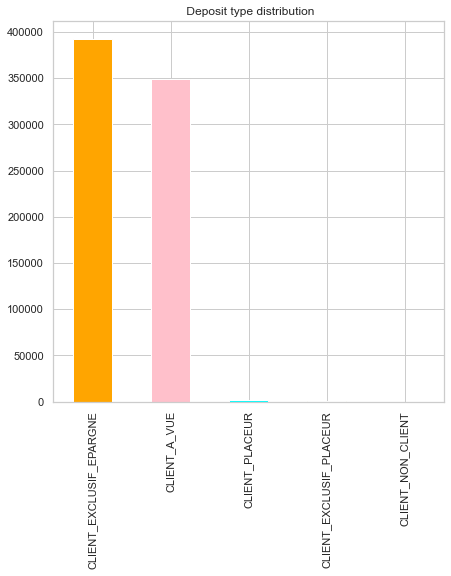

In [83]:
data.CLIENT_TYPE_DEPOSANT.value_counts().plot(kind="bar" , color=['orange', 'pink', 'cyan', 'olive'])
plt.title(" Deposit type distribution")
plt.show()

In [84]:
data['CLIENT_TYPE_DEPOSANT'].value_counts()

CLIENT_EXCLUSIF_EPARGNE    392354
CLIENT_A_VUE               349286
CLIENT_PLACEUR               2204
CLIENT_EXCLUSIF_PLACEUR        97
CLIENT_NON_CLIENT               1
Name: CLIENT_TYPE_DEPOSANT, dtype: int64

### Missing values

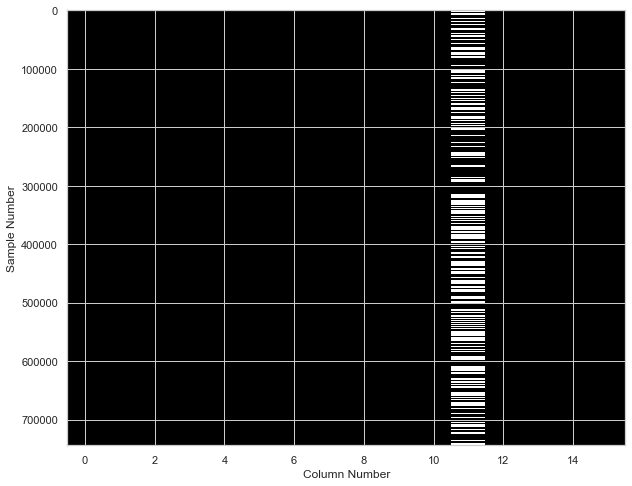

In [85]:
#Per sample
plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [86]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


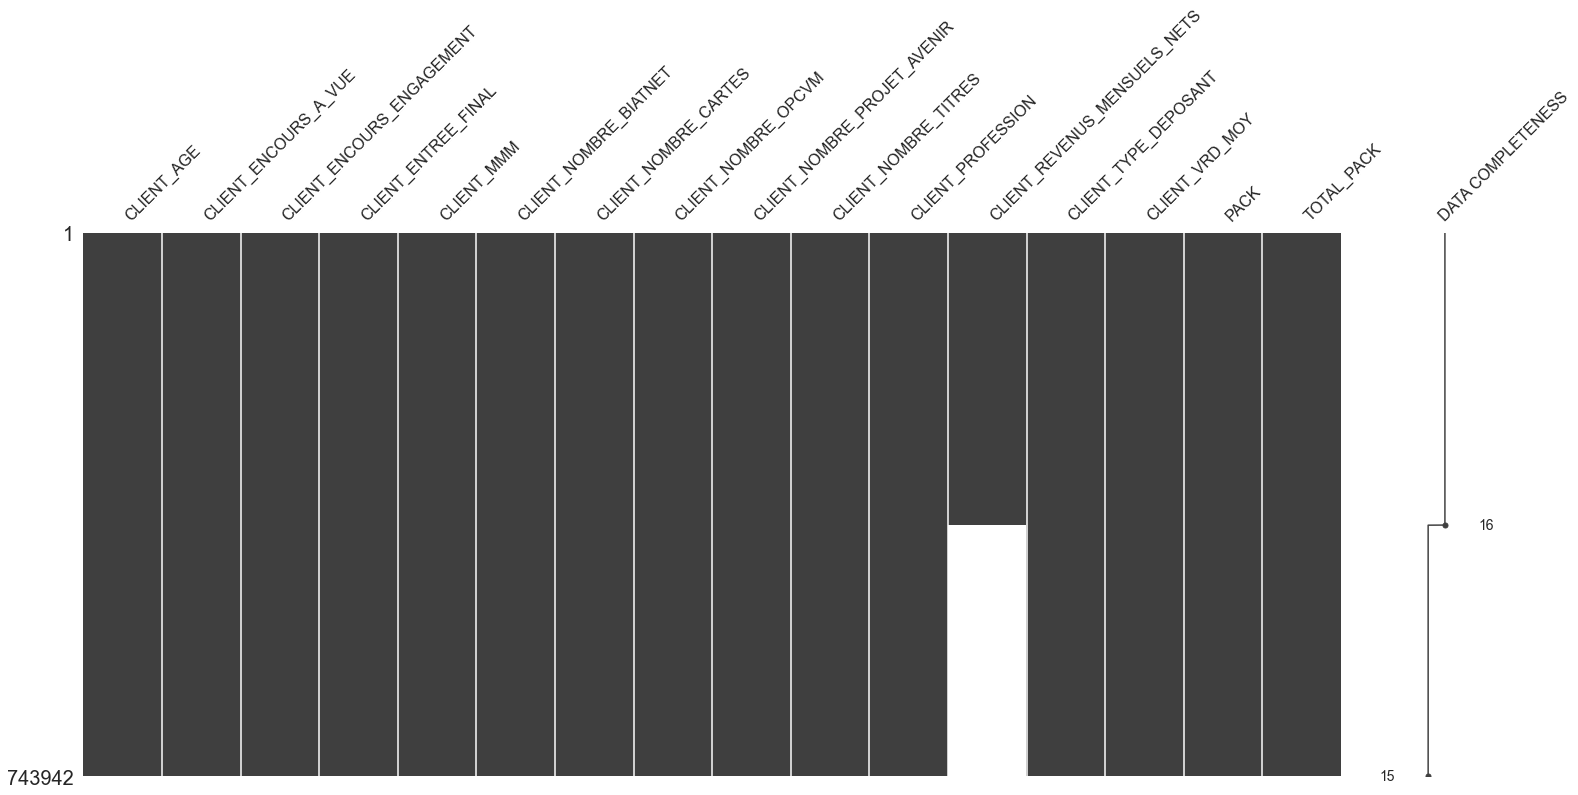

In [87]:
import missingno as msno

msno.matrix(data, labels=True, sort="descending");

In [88]:
(data.isnull().sum()/(len(data)))*100


CLIENT_AGE                       0.000000
CLIENT_ENCOURS_A_VUE             0.000000
CLIENT_ENCOURS_ENGAGEMENT        0.000000
CLIENT_ENTREE_FINAL              0.000000
CLIENT_MMM                       0.000000
CLIENT_NOMBRE_BIATNET            0.000000
CLIENT_NOMBRE_CARTES             0.000000
CLIENT_NOMBRE_OPCVM              0.000000
CLIENT_NOMBRE_PROJET_AVENIR      0.000000
CLIENT_NOMBRE_TITRES             0.000000
CLIENT_PROFESSION                0.000000
CLIENT_REVENUS_MENSUELS_NETS    46.196747
CLIENT_TYPE_DEPOSANT             0.000000
CLIENT_VRD_MOY                   0.000000
PACK                             0.000000
TOTAL_PACK                       0.000000
dtype: float64

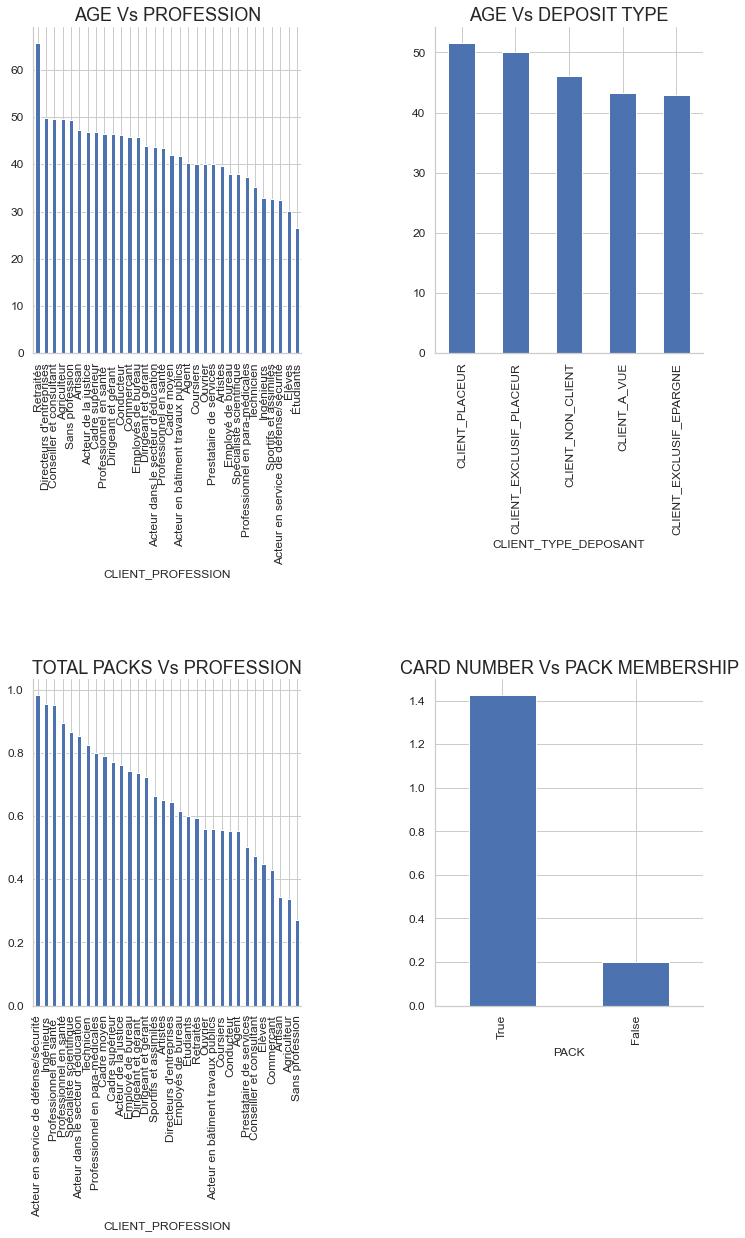

In [89]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 18))
data.groupby('CLIENT_PROFESSION')['CLIENT_AGE'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("AGE Vs PROFESSION", fontsize=18)

data.groupby('CLIENT_TYPE_DEPOSANT')['CLIENT_AGE'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("AGE Vs DEPOSIT TYPE", fontsize=18)

data.groupby('CLIENT_PROFESSION')['TOTAL_PACK'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("TOTAL PACKS Vs PROFESSION", fontsize=18)

data.groupby('PACK')['CLIENT_NOMBRE_CARTES'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("CARD NUMBER Vs PACK MEMBERSHIP", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [90]:
data['CLIENT_REVENUS_MENSUELS_NETS'].describe()

count    4.002650e+05
mean     2.123732e+03
std      9.678913e+04
min      0.000000e+00
25%      7.000000e+02
50%      1.000000e+03
75%      1.500000e+03
max      5.291859e+07
Name: CLIENT_REVENUS_MENSUELS_NETS, dtype: float64

#### Detecting outliers

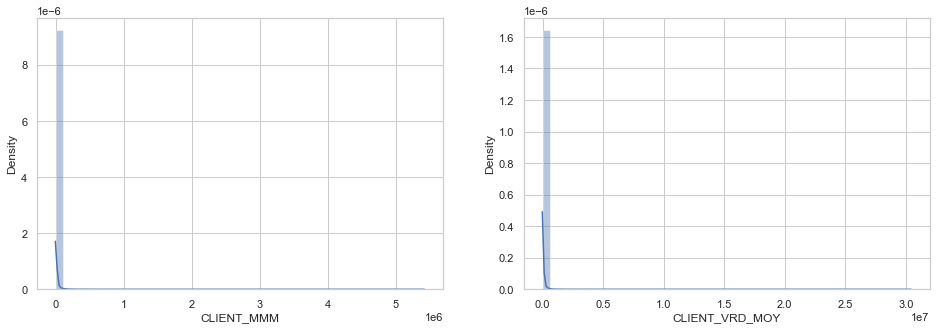

In [91]:
#Plot distributions for the feautures
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['CLIENT_MMM'])
plt.subplot(1,2,2)
sns.distplot(data['CLIENT_VRD_MOY'])
plt.show()

The two features are skewed

##### CLIENT_MMM

Text(0, 0.5, 'No of customers')

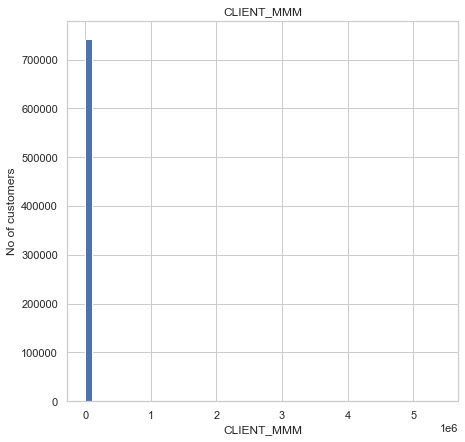

In [92]:
# CLIENT_MMM is skewed
figure=data.CLIENT_MMM.hist(bins=50)
figure.set_title('CLIENT_MMM')
figure.set_xlabel('CLIENT_MMM')
figure.set_ylabel('No of customers')

<AxesSubplot:>

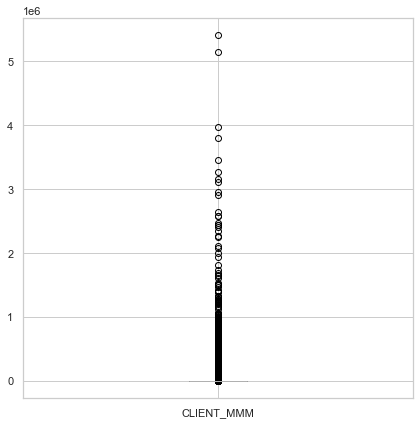

In [93]:
data.boxplot(column="CLIENT_MMM")

<AxesSubplot:>

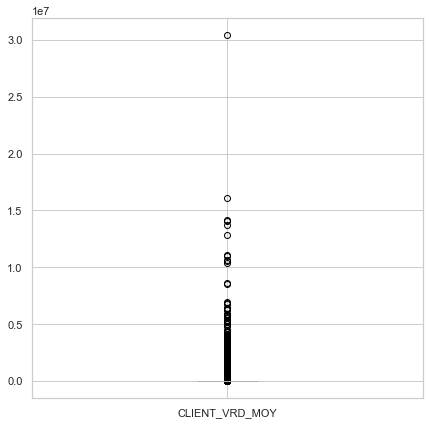

In [94]:
data.boxplot(column="CLIENT_VRD_MOY")


Text(0, 0.5, 'No of customers')

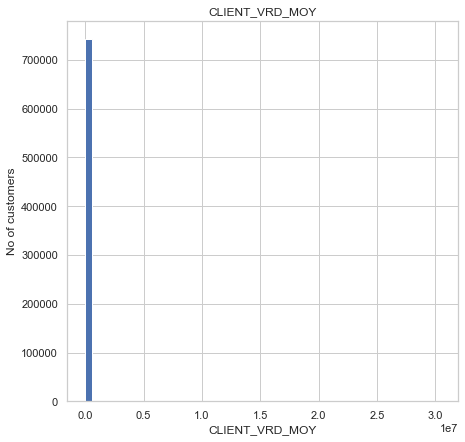

In [95]:
# CLIENT_MMM is skewed
figure=data.CLIENT_VRD_MOY.hist(bins=50)
figure.set_title('CLIENT_VRD_MOY')
figure.set_xlabel('CLIENT_VRD_MOY')
figure.set_ylabel('No of customers')

<AxesSubplot:>

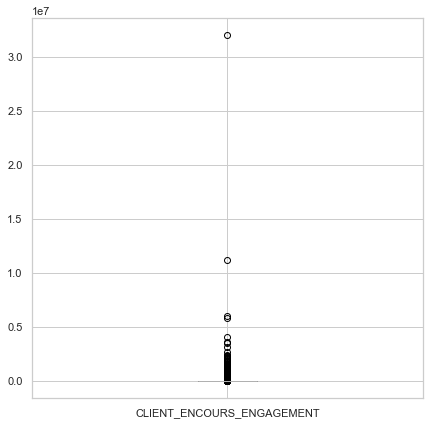

In [96]:
data.boxplot(column="CLIENT_ENCOURS_ENGAGEMENT")

<AxesSubplot:>

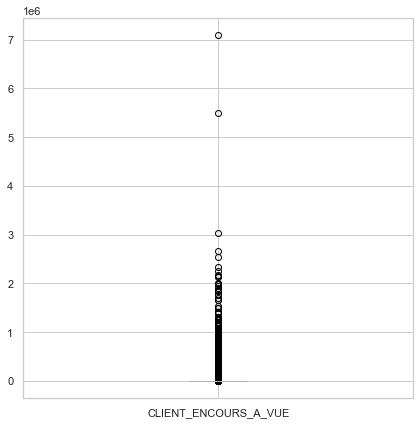

In [97]:
data.boxplot(column="CLIENT_ENCOURS_A_VUE")


<AxesSubplot:>

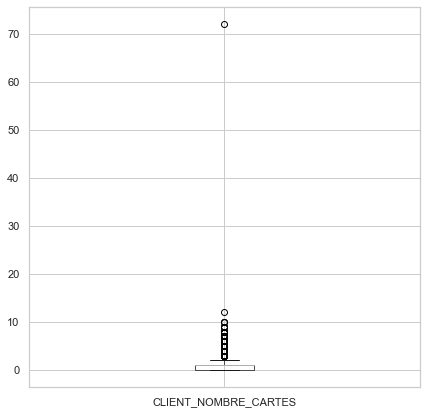

In [98]:
data.boxplot(column="CLIENT_NOMBRE_CARTES")


<AxesSubplot:>

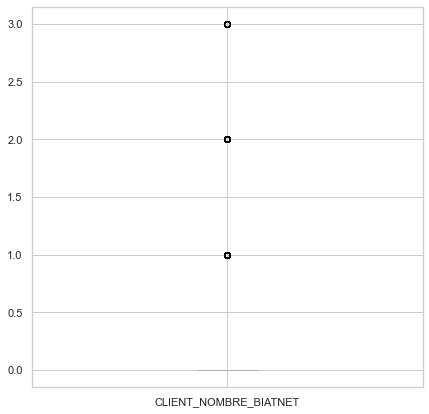

In [99]:
data.boxplot(column="CLIENT_NOMBRE_BIATNET")


<AxesSubplot:>

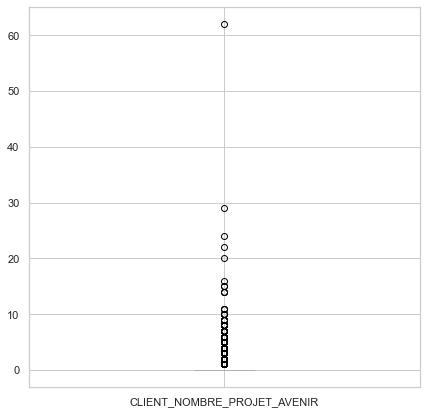

In [100]:
data.CLIENT_NOMBRE_PROJET_AVENIR = data.CLIENT_NOMBRE_PROJET_AVENIR.astype('int')
data.boxplot(column="CLIENT_NOMBRE_PROJET_AVENIR")


<AxesSubplot:>

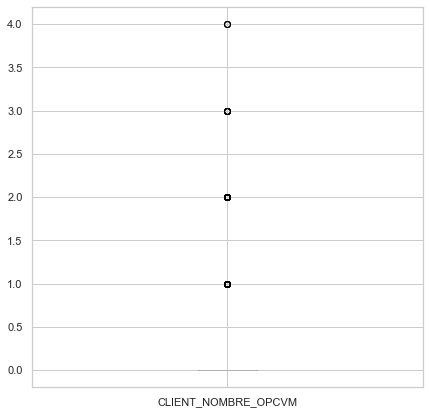

In [101]:
data.CLIENT_NOMBRE_OPCVM = data.CLIENT_NOMBRE_OPCVM.astype('int')
data.boxplot(column="CLIENT_NOMBRE_OPCVM")

<AxesSubplot:>

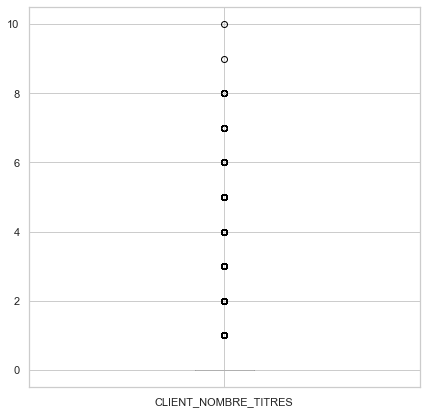

In [102]:
data.CLIENT_NOMBRE_TITRES = data.CLIENT_NOMBRE_TITRES.astype('int')
data.boxplot(column="CLIENT_NOMBRE_TITRES")

In [103]:
data['CLIENT_NOMBRE_OPCVM'].value_counts()

0    740567
1      3202
2       163
3         7
4         3
Name: CLIENT_NOMBRE_OPCVM, dtype: int64

In [104]:
data['CLIENT_NOMBRE_TITRES'].value_counts()

0     741003
2        996
1        995
3        374
5        236
4        223
6         66
7         33
8         14
10         1
9          1
Name: CLIENT_NOMBRE_TITRES, dtype: int64

In [105]:
Q1=data[["CLIENT_MMM","CLIENT_NOMBRE_OPCVM","CLIENT_NOMBRE_TITRES","CLIENT_VRD_MOY"
         ,"CLIENT_NOMBRE_CARTES","CLIENT_NOMBRE_BIATNET","CLIENT_NOMBRE_PROJET_AVENIR",
         "CLIENT_ENCOURS_A_VUE","CLIENT_ENCOURS_ENGAGEMENT"]].describe().T["25%"]
Q3=data[["CLIENT_MMM","CLIENT_NOMBRE_OPCVM","CLIENT_NOMBRE_TITRES","CLIENT_VRD_MOY"
         ,"CLIENT_NOMBRE_CARTES","CLIENT_NOMBRE_BIATNET","CLIENT_NOMBRE_PROJET_AVENIR",
         "CLIENT_ENCOURS_A_VUE","CLIENT_ENCOURS_ENGAGEMENT"]].describe().T["75%"].T
IQR=(Q3-Q1)


In [106]:
data[data.CLIENT_MMM<(Q1.CLIENT_MMM - 3 * IQR.CLIENT_MMM)]
data.drop(data[data.CLIENT_MMM>(Q3.CLIENT_MMM + 3  * IQR.CLIENT_MMM)].index,inplace=True)

data[data.CLIENT_NOMBRE_OPCVM<(Q1.CLIENT_NOMBRE_OPCVM - 3 * IQR.CLIENT_NOMBRE_OPCVM)]
data.drop(data[data.CLIENT_NOMBRE_OPCVM>(Q3.CLIENT_NOMBRE_OPCVM + 3  * IQR.CLIENT_NOMBRE_OPCVM)].index,inplace=True)

data[data.CLIENT_NOMBRE_TITRES<(Q1.CLIENT_NOMBRE_TITRES - 3 * IQR.CLIENT_NOMBRE_TITRES)]
data.drop(data[data.CLIENT_NOMBRE_TITRES>(Q3.CLIENT_NOMBRE_TITRES + 3  * IQR.CLIENT_NOMBRE_TITRES)].index,inplace=True)

data[data.CLIENT_VRD_MOY<(Q1.CLIENT_VRD_MOY - 3 * IQR.CLIENT_VRD_MOY)]
data.drop(data[data.CLIENT_VRD_MOY>(Q3.CLIENT_VRD_MOY + 3  * IQR.CLIENT_VRD_MOY)].index,inplace=True)

data[data.CLIENT_NOMBRE_CARTES<(Q1.CLIENT_NOMBRE_CARTES - 3 * IQR.CLIENT_NOMBRE_CARTES)]
data.drop(data[data.CLIENT_NOMBRE_CARTES>(Q3.CLIENT_NOMBRE_CARTES + 3  * IQR.CLIENT_NOMBRE_CARTES)].index,inplace=True)

data[data.CLIENT_NOMBRE_BIATNET<(Q1.CLIENT_NOMBRE_BIATNET - 3 * IQR.CLIENT_NOMBRE_BIATNET)]
data.drop(data[data.CLIENT_NOMBRE_BIATNET>(Q3.CLIENT_NOMBRE_BIATNET + 3  * IQR.CLIENT_NOMBRE_BIATNET)].index,inplace=True)

data[data.CLIENT_NOMBRE_PROJET_AVENIR<(Q1.CLIENT_NOMBRE_PROJET_AVENIR - 3 * IQR.CLIENT_NOMBRE_PROJET_AVENIR)]
data.drop(data[data.CLIENT_NOMBRE_PROJET_AVENIR>(Q3.CLIENT_NOMBRE_PROJET_AVENIR + 3  * IQR.CLIENT_NOMBRE_PROJET_AVENIR)].index,inplace=True)

data[data.CLIENT_ENCOURS_A_VUE<(Q1.CLIENT_ENCOURS_A_VUE - 3 * IQR.CLIENT_ENCOURS_A_VUE)]
data.drop(data[data.CLIENT_ENCOURS_A_VUE>(Q3.CLIENT_ENCOURS_A_VUE + 3  * IQR.CLIENT_ENCOURS_A_VUE)].index,inplace=True)

data[data.CLIENT_ENCOURS_ENGAGEMENT<(Q1.CLIENT_ENCOURS_ENGAGEMENT - 3 * IQR.CLIENT_ENCOURS_ENGAGEMENT)]
data.drop(data[data.CLIENT_ENCOURS_ENGAGEMENT>(Q3.CLIENT_ENCOURS_ENGAGEMENT+ 3  * IQR.CLIENT_ENCOURS_ENGAGEMENT)].index,inplace=True)

In [107]:
data['CLIENT_MMM'].describe()

count    395490.000000
mean         52.355631
std         265.093698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4704.003000
Name: CLIENT_MMM, dtype: float64

<AxesSubplot:xlabel='CLIENT_ENCOURS_ENGAGEMENT'>

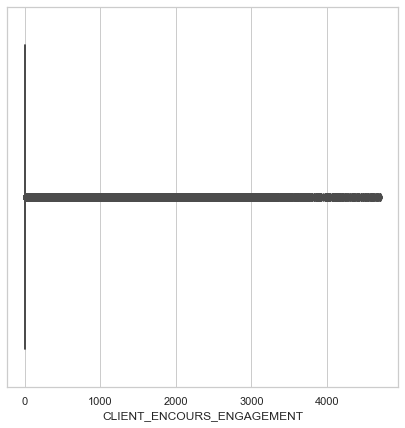

In [108]:
sns.set_theme(style="whitegrid")
sns.boxplot(x = data["CLIENT_MMM"] ,data = data)
sns.boxplot(x = data["CLIENT_ENCOURS_ENGAGEMENT"] ,data = data)


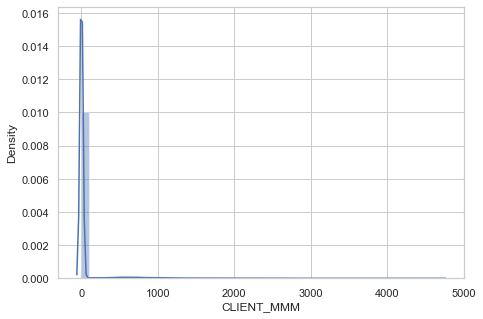

In [109]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['CLIENT_MMM'])
plt.show()

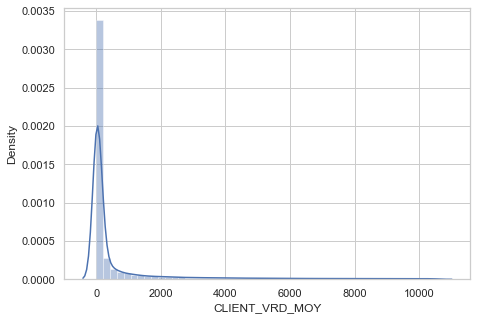

In [110]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['CLIENT_VRD_MOY'])
plt.show()

Text(0, 0.5, 'No of customers')

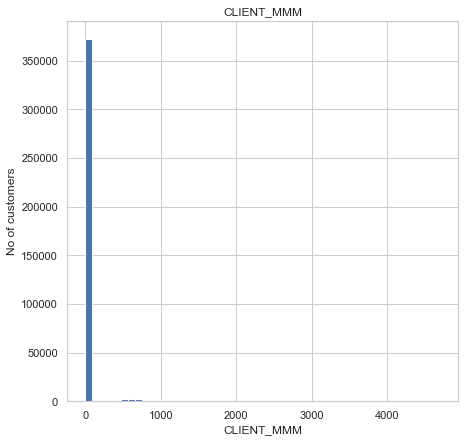

In [111]:
figure=data.CLIENT_MMM.hist(bins=50)
figure.set_title('CLIENT_MMM')
figure.set_xlabel('CLIENT_MMM')
figure.set_ylabel('No of customers')

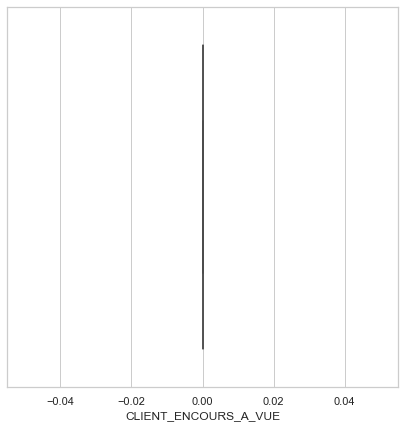

In [112]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = data["CLIENT_ENCOURS_A_VUE"] ,data = data)

In [113]:
data = data.drop(columns='CLIENT_REVENUS_MENSUELS_NETS')

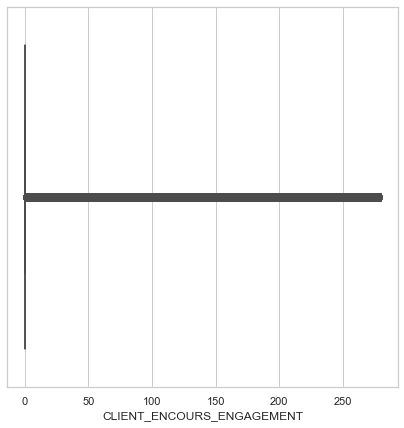

In [114]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = data["CLIENT_ENCOURS_ENGAGEMENT"] ,data = data)

In [115]:
data.nunique()

CLIENT_AGE                         61
CLIENT_ENCOURS_A_VUE                1
CLIENT_ENCOURS_ENGAGEMENT       25918
CLIENT_ENTREE_FINAL                 2
CLIENT_MMM                      20566
CLIENT_NOMBRE_BIATNET               1
CLIENT_NOMBRE_CARTES                5
CLIENT_NOMBRE_OPCVM                 1
CLIENT_NOMBRE_PROJET_AVENIR         1
CLIENT_NOMBRE_TITRES                1
CLIENT_PROFESSION                  32
CLIENT_TYPE_DEPOSANT                5
CLIENT_VRD_MOY                 253898
PACK                                2
TOTAL_PACK                          5
dtype: int64

In [116]:
data.shape

(395490, 15)

In [117]:
data = data.drop(columns='CLIENT_ENTREE_FINAL')

In [118]:
data

,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
1,58,0.0,84.396,0.000,0.0,0.0,0,0,0,Directeurs d'entreprises,CLIENT_A_VUE,0.00000,True,1
7,54,0.0,0.000,0.000,0.0,0.0,0,0,0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,766.93525,True,1
10,32,0.0,0.000,0.000,0.0,0.0,0,0,0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,4040.74640,False,0
13,49,0.0,0.000,0.000,0.0,0.0,0,0,0,Cadre moyen,CLIENT_A_VUE,290.84965,False,0
14,39,0.0,0.000,0.000,0.0,0.0,0,0,0,Acteur dans le secteur d'éducation,CLIENT_A_VUE,8232.68285,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834740,41,0.0,0.000,0.000,0.0,0.0,0,0,0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,889.95085,False,0
834741,41,0.0,31.386,166.666,0.0,2.0,0,0,0,Commerçant,CLIENT_A_VUE,20.38160,True,1
834746,33,0.0,0.000,0.000,0.0,0.0,0,0,0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,0.02700,False,0
834748,39,0.0,0.000,0.000,0.0,0.0,0,0,0,Conducteur,CLIENT_EXCLUSIF_EPARGNE,68.23560,False,0


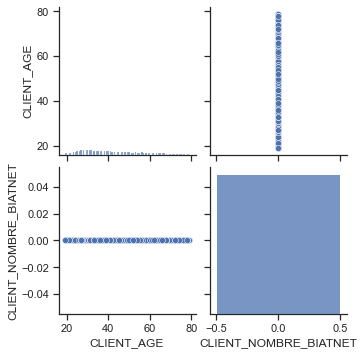

In [119]:
sns.set(style="ticks", color_codes=True)
gggg = sns.pairplot(data , vars=["CLIENT_AGE", "CLIENT_NOMBRE_BIATNET"])
plt.show()

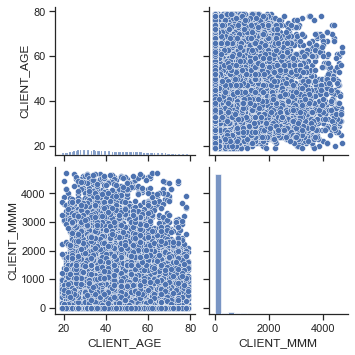

In [120]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data , vars=["CLIENT_AGE", "CLIENT_MMM"])
plt.show()

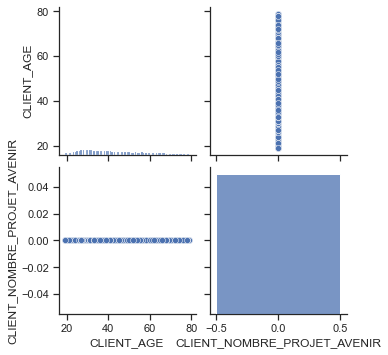

In [121]:
sns.set(style="ticks", color_codes=True)
fggg = sns.pairplot(data , vars=["CLIENT_AGE", "CLIENT_NOMBRE_PROJET_AVENIR"])
plt.show()

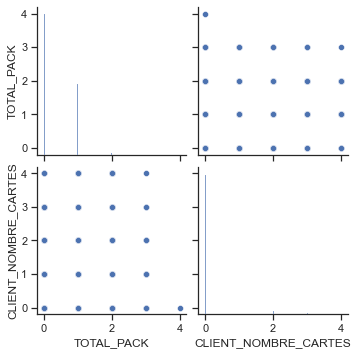

In [122]:
sns.set(style="ticks", color_codes=True)
ggg = sns.pairplot(data , vars=["TOTAL_PACK", "CLIENT_NOMBRE_CARTES"])
plt.show()

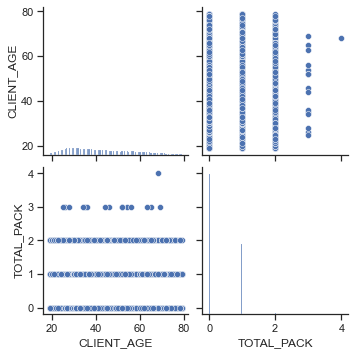

In [123]:
sns.set(style="ticks", color_codes=True)
gg = sns.pairplot(data , vars=["CLIENT_AGE", "TOTAL_PACK"])
plt.show()

In [124]:
data['CLIENT_NOMBRE_CARTES'].value_counts()

0.0    258507
1.0    128597
2.0      6693
3.0      1532
4.0       161
Name: CLIENT_NOMBRE_CARTES, dtype: int64

In [125]:
data.CLIENT_NOMBRE_PROJET_AVENIR.value_counts()
data.CLIENT_NOMBRE_OPCVM.value_counts()
data.CLIENT_NOMBRE_BIATNET.value_counts()
data.CLIENT_NOMBRE_CARTES.value_counts()
data.CLIENT_NOMBRE_TITRES.value_counts()


0    395490
Name: CLIENT_NOMBRE_TITRES, dtype: int64

In [126]:
data = data.drop(columns=['CLIENT_NOMBRE_OPCVM','CLIENT_NOMBRE_PROJET_AVENIR','CLIENT_NOMBRE_TITRES'])

In [127]:
data

,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_PROFESSION,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
1,58,0.0,84.396,0.000,0.0,0.0,Directeurs d'entreprises,CLIENT_A_VUE,0.00000,True,1
7,54,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,766.93525,True,1
10,32,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,4040.74640,False,0
13,49,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_A_VUE,290.84965,False,0
14,39,0.0,0.000,0.000,0.0,0.0,Acteur dans le secteur d'éducation,CLIENT_A_VUE,8232.68285,False,0
...,...,...,...,...,...,...,...,...,...,...,...
834740,41,0.0,0.000,0.000,0.0,0.0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,889.95085,False,0
834741,41,0.0,31.386,166.666,0.0,2.0,Commerçant,CLIENT_A_VUE,20.38160,True,1
834746,33,0.0,0.000,0.000,0.0,0.0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,0.02700,False,0
834748,39,0.0,0.000,0.000,0.0,0.0,Conducteur,CLIENT_EXCLUSIF_EPARGNE,68.23560,False,0


In [128]:
data.CLIENT_TYPE_DEPOSANT.unique()

array(['CLIENT_A_VUE', 'CLIENT_EXCLUSIF_EPARGNE', 'CLIENT_PLACEUR',
       'CLIENT_EXCLUSIF_PLACEUR', 'CLIENT_NON_CLIENT'], dtype=object)

In [129]:
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

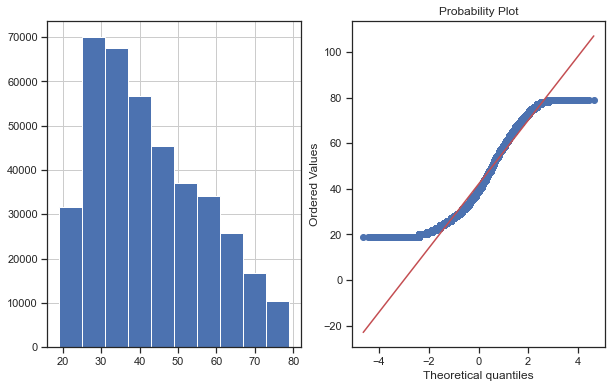

In [130]:
plot_data(data,'CLIENT_AGE')


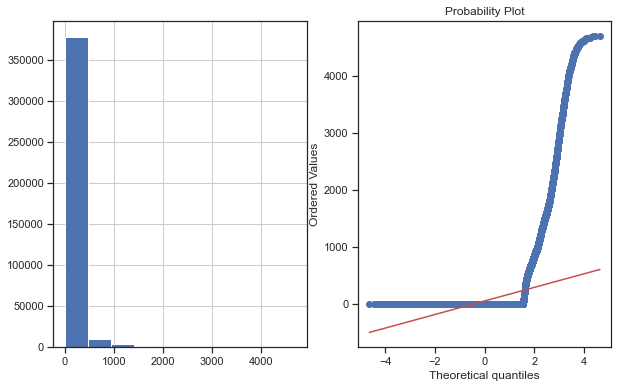

In [131]:
plot_data(data,'CLIENT_MMM')

In [132]:
data

,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_PROFESSION,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
1,58,0.0,84.396,0.000,0.0,0.0,Directeurs d'entreprises,CLIENT_A_VUE,0.00000,True,1
7,54,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,766.93525,True,1
10,32,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,4040.74640,False,0
13,49,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_A_VUE,290.84965,False,0
14,39,0.0,0.000,0.000,0.0,0.0,Acteur dans le secteur d'éducation,CLIENT_A_VUE,8232.68285,False,0
...,...,...,...,...,...,...,...,...,...,...,...
834740,41,0.0,0.000,0.000,0.0,0.0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,889.95085,False,0
834741,41,0.0,31.386,166.666,0.0,2.0,Commerçant,CLIENT_A_VUE,20.38160,True,1
834746,33,0.0,0.000,0.000,0.0,0.0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,0.02700,False,0
834748,39,0.0,0.000,0.000,0.0,0.0,Conducteur,CLIENT_EXCLUSIF_EPARGNE,68.23560,False,0


Once this is done, we move onto an initial diagnostic called the Hopkins Statistic. The Hopkins statistic measures the extent that the points are randomly spaced, or the degree that the points clump together [6]. A score of .50 or above indicates that the data is random, with no discernible clustering patterns. Anything above .45 usually fails to produce reliable clusters. Ideally the data yield a score of .35 or below.

In [133]:
#Calculate the Hopkins Statistic
#hopkins(data, n=nrow(data)-1)

### Feature scaling
normalize the continuous features in our data to ensure that one feature is not interpreted as being more important than the other.
Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.

In [134]:
from sklearn import preprocessing
data_norm = data.copy()
scaler = preprocessing.MinMaxScaler()
data_norm[['CLIENT_AGE','CLIENT_ENCOURS_A_VUE','CLIENT_ENCOURS_ENGAGEMENT','CLIENT_MMM','CLIENT_NOMBRE_CARTES','CLIENT_VRD_MOY','TOTAL_PACK']] = scaler.fit_transform(data_norm[['CLIENT_AGE','CLIENT_ENCOURS_A_VUE','CLIENT_ENCOURS_ENGAGEMENT','CLIENT_MMM','CLIENT_NOMBRE_CARTES','CLIENT_VRD_MOY','TOTAL_PACK']])

In [135]:
data

,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_PROFESSION,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
1,58,0.0,84.396,0.000,0.0,0.0,Directeurs d'entreprises,CLIENT_A_VUE,0.00000,True,1
7,54,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,766.93525,True,1
10,32,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,4040.74640,False,0
13,49,0.0,0.000,0.000,0.0,0.0,Cadre moyen,CLIENT_A_VUE,290.84965,False,0
14,39,0.0,0.000,0.000,0.0,0.0,Acteur dans le secteur d'éducation,CLIENT_A_VUE,8232.68285,False,0
...,...,...,...,...,...,...,...,...,...,...,...
834740,41,0.0,0.000,0.000,0.0,0.0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,889.95085,False,0
834741,41,0.0,31.386,166.666,0.0,2.0,Commerçant,CLIENT_A_VUE,20.38160,True,1
834746,33,0.0,0.000,0.000,0.0,0.0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,0.02700,False,0
834748,39,0.0,0.000,0.000,0.0,0.0,Conducteur,CLIENT_EXCLUSIF_EPARGNE,68.23560,False,0


In [136]:
data_dummied = pd.get_dummies(data_norm)

In [137]:
data_dummied

,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_VRD_MOY,PACK,TOTAL_PACK,CLIENT_PROFESSION_Acteur dans le secteur d'éducation,CLIENT_PROFESSION_Acteur de la justice,CLIENT_PROFESSION_Acteur en bâtiment travaux publics,CLIENT_PROFESSION_Acteur en service de défense/sécurité,CLIENT_PROFESSION_Agent,CLIENT_PROFESSION_Agriculteur,CLIENT_PROFESSION_Artisan,CLIENT_PROFESSION_Artistes,CLIENT_PROFESSION_Cadre moyen,CLIENT_PROFESSION_Cadre supérieur,CLIENT_PROFESSION_Commerçant,CLIENT_PROFESSION_Conducteur,CLIENT_PROFESSION_Conseiller et consultant,CLIENT_PROFESSION_Coursiers,CLIENT_PROFESSION_Directeurs d'entreprises,CLIENT_PROFESSION_Dirigeant et gérant,CLIENT_PROFESSION_Dirigeant et gérant,CLIENT_PROFESSION_Employé de bureau,CLIENT_PROFESSION_Employés de bureau,CLIENT_PROFESSION_Ingénieurs,CLIENT_PROFESSION_Ouvrier,CLIENT_PROFESSION_Prestataire de services,CLIENT_PROFESSION_Professionnel en para-médicales,CLIENT_PROFESSION_Professionnel en santé,CLIENT_PROFESSION_Professionnel en santé,CLIENT_PROFESSION_Retraités,CLIENT_PROFESSION_Sans profession,CLIENT_PROFESSION_Sportifs et assimilés,CLIENT_PROFESSION_Spécialiste scientifique,CLIENT_PROFESSION_Technicien,CLIENT_PROFESSION_Élèves,CLIENT_PROFESSION_Étudiants,CLIENT_TYPE_DEPOSANT_CLIENT_A_VUE,CLIENT_TYPE_DEPOSANT_CLIENT_EXCLUSIF_EPARGNE,CLIENT_TYPE_DEPOSANT_CLIENT_EXCLUSIF_PLACEUR,CLIENT_TYPE_DEPOSANT_CLIENT_NON_CLIENT,CLIENT_TYPE_DEPOSANT_CLIENT_PLACEUR
1,0.650000,0.0,0.302060,0.000000,0.0,0.0,0.000000,True,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0.583333,0.0,0.000000,0.000000,0.0,0.0,0.072351,True,0.25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,0.216667,0.0,0.000000,0.000000,0.0,0.0,0.381197,False,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13,0.500000,0.0,0.000000,0.000000,0.0,0.0,0.027438,False,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.776657,False,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834740,0.366667,0.0,0.000000,0.000000,0.0,0.0,0.083956,False,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
834741,0.366667,0.0,0.112333,0.035431,0.0,0.5,0.001923,True,0.25,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
834746,0.233333,0.0,0.000000,0.000000,0.0,0.0,0.000003,False,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
834748,0.333333,0.0,0.000000,0.000000,0.0,0.0,0.006437,False,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Feature standarization
Standardizing a dataset involves rescaling the distribution of values so
that the mean of observed values is 0 and the standard deviation is 1.
This can be thought of as subtracting the mean value or centering the data.

In [138]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data_stand = sc_X.fit_transform(data_dummied)

In [139]:
data_stand

array([[ 1.11146119e+00,  0.00000000e+00,  3.00525183e+00, ...,
        -5.02849170e-03, -1.59013060e-03, -1.11315897e-02],
       [ 8.32662857e-01,  0.00000000e+00, -1.92910106e-01, ...,
        -5.02849170e-03, -1.59013060e-03, -1.11315897e-02],
       [-7.00727989e-01,  0.00000000e+00, -1.92910106e-01, ...,
        -5.02849170e-03, -1.59013060e-03, -1.11315897e-02],
       ...,
       [-6.31028406e-01,  0.00000000e+00, -1.92910106e-01, ...,
        -5.02849170e-03, -1.59013060e-03, -1.11315897e-02],
       [-2.12830902e-01,  0.00000000e+00, -1.92910106e-01, ...,
        -5.02849170e-03, -1.59013060e-03, -1.11315897e-02],
       [ 2.05366602e-01,  0.00000000e+00, -1.92910106e-01, ...,
        -5.02849170e-03, -1.59013060e-03, -1.11315897e-02]])

In [140]:
data_stand.shape

(395490, 46)